# MIS 665_Final project

Sang su Ha; "On my honor, as a student, I have neither given nor received unauthorized aid on this academic work"

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from string import ascii_letters
from mpl_toolkits import mplot3d
import chart_studio.plotly as py
import plotly.express as px
import plotly.graph_objects as go
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits import mplot3d

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model

import statsmodels.api as sm
from statsmodels.formula.api import ols

import sklearn.linear_model as lm
from sklearn.metrics import explained_variance_score

from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest

from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display
from sklearn import metrics

# Classifiers
#import decisiontreeclassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.externals.six import StringIO
import pydotplus

#import logisticregression classifier
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
#import knn classifier
from sklearn.neighbors import KNeighborsClassifier

#for validating your classification model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

# feature selection
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# grid search
from sklearn.model_selection import GridSearchCV

from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

import sklearn.linear_model as lm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score

from sklearn.cluster import KMeans
from sklearn import tree
from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import pairwise_distances

from sklearn.cluster import ward_tree
from scipy.cluster.hierarchy import dendrogram, linkage, ward

from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest


import statsmodels.api as sm
from statsmodels.formula.api import ols

# 1. Introduction

The IMDb score is recognized as an important indicator for the general audience to select a movie when there is no prior information on the movie. The main goal of this project is to find out the objective credibility of the IMDb score commissioned by the film distributors and what factors should be focused on when choosing a film in the future.I would also like to know

# 2. Data understanding

In [2]:
df=pd.read_csv("C:/Users/SangSuHa/Desktop/DA665/Mid_term_project/movie_metadata.csv")
pd.set_option('display.max_columns', None)
df.head()

color      director_name  num_critic_for_reviews  duration  \
0  Color      James Cameron                   723.0     178.0   
1  Color     Gore Verbinski                   302.0     169.0   
2  Color         Sam Mendes                   602.0     148.0   
3  Color  Christopher Nolan                   813.0     164.0   
4    NaN        Doug Walker                     NaN       NaN   

   director_facebook_likes  actor_3_facebook_likes      actor_2_name  \
0                      0.0                   855.0  Joel David Moore   
1                    563.0                  1000.0     Orlando Bloom   
2                      0.0                   161.0      Rory Kinnear   
3                  22000.0                 23000.0    Christian Bale   
4                    131.0                     NaN        Rob Walker   

   actor_1_facebook_likes        gross                           genres  \
0                  1000.0  760505847.0  Action|Adventure|Fantasy|Sci-Fi   
1                 40000.0  309404152.0         Action|Adventure|Fantasy   
2                 11000.0  200074175.0        Action|Adventure|Thriller   
3                 27000.0  448130642.0                  Action|Thriller   
4                   131.0          NaN                      Documentary   

      actor_1_name                                        movie_title  \
0      CCH Pounder                                            Avatar    
1      Johnny Depp          Pirates of the Caribbean: At World's End    
2  Christoph Waltz                                           Spectre    
3        Tom Hardy                             The Dark Knight Rises    
4      Doug Walker  Star Wars: Episode VII - The Force Awakens    ...   

   num_voted_users  cast_total_facebook_likes          actor_3_name  \
0           886204                       4834             Wes Studi   
1           471220                      48350        Jack Davenport   
2           275868                      11700      Stephanie Sigman   
3          1144337                     106759  Joseph Gordon-Levitt   
4                8                        143                   NaN   

   facenumber_in_poster                                      plot_keywords  \
0                   0.0             avatar|future|marine|native|paraplegic   
1                   0.0  goddess|marriage ceremony|marriage proposal|pi...   
2                   1.0                bomb|espionage|sequel|spy|terrorist   
3                   0.0  deception|imprisonment|lawlessness|police offi...   
4                   0.0                                                NaN   

                                     movie_imdb_link  num_user_for_reviews  \
0  http://www.imdb.com/title/tt0499549/?ref_=fn_t...                3054.0   
1  http://www.imdb.com/title/tt0449088/?ref_=fn_t...                1238.0   
2  http://www.imdb.com/title/tt2379713/?ref_=fn_t...                 994.0   
3  http://www.imdb.com/title/tt1345836/?ref_=fn_t...                2701.0   
4  http://www.imdb.com/title/tt5289954/?ref_=fn_t...                   NaN   

  language country content_rating       budget  title_year  \
0  English     USA          PG-13  237000000.0      2009.0   
1  English     USA          PG-13  300000000.0      2007.0   
2  English      UK          PG-13  245000000.0      2015.0   
3  English     USA          PG-13  250000000.0      2012.0   
4      NaN     NaN            NaN          NaN         NaN   

   actor_2_facebook_likes  imdb_score  aspect_ratio  movie_facebook_likes  
0                   936.0         7.9          1.78                 33000  
1                  5000.0         7.1          2.35                     0  
2                   393.0         6.8          2.35                 85000  
3                 23000.0         8.5          2.35                164000  
4                    12.0         7.1           NaN                     0

## 2.1 Check the columns names

In [3]:
df.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

## 2.2 Identify data type

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
color                        5024 non-null object
director_name                4939 non-null object
num_critic_for_reviews       4993 non-null float64
duration                     5028 non-null float64
director_facebook_likes      4939 non-null float64
actor_3_facebook_likes       5020 non-null float64
actor_2_name                 5030 non-null object
actor_1_facebook_likes       5036 non-null float64
gross                        4159 non-null float64
genres                       5043 non-null object
actor_1_name                 5036 non-null object
movie_title                  5043 non-null object
num_voted_users              5043 non-null int64
cast_total_facebook_likes    5043 non-null int64
actor_3_name                 5020 non-null object
facenumber_in_poster         5030 non-null float64
plot_keywords                4890 non-null object
movie_imdb_link              5043 non-

## 2.3 Identify missing values

In [5]:
df.isnull().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

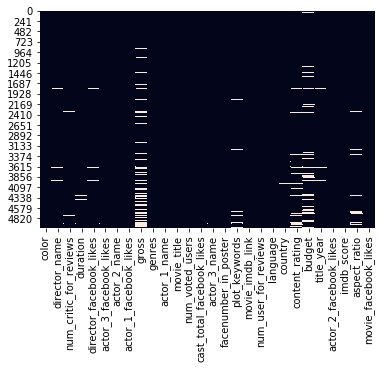

In [6]:
sns.heatmap(df.isnull(), cbar=False)

## 2.4 Describe data

In [7]:
df.describe().T

count          mean           std      min  \
num_critic_for_reviews     4993.0  1.401943e+02  1.216017e+02     1.00   
duration                   5028.0  1.072011e+02  2.519744e+01     7.00   
director_facebook_likes    4939.0  6.865092e+02  2.813329e+03     0.00   
actor_3_facebook_likes     5020.0  6.450098e+02  1.665042e+03     0.00   
actor_1_facebook_likes     5036.0  6.560047e+03  1.502076e+04     0.00   
gross                      4159.0  4.846841e+07  6.845299e+07   162.00   
num_voted_users            5043.0  8.366816e+04  1.384853e+05     5.00   
cast_total_facebook_likes  5043.0  9.699064e+03  1.816380e+04     0.00   
facenumber_in_poster       5030.0  1.371173e+00  2.013576e+00     0.00   
num_user_for_reviews       5022.0  2.727708e+02  3.779829e+02     1.00   
budget                     4551.0  3.975262e+07  2.061149e+08   218.00   
title_year                 4935.0  2.002471e+03  1.247460e+01  1916.00   
actor_2_facebook_likes     5030.0  1.651754e+03  4.042439e+03     0.00   
imdb_score                 5043.0  6.442138e+00  1.125116e+00     1.60   
aspect_ratio               4714.0  2.220403e+00  1.385113e+00     1.18   
movie_facebook_likes       5043.0  7.525965e+03  1.932045e+04     0.00   

                                  25%          50%          75%           max  
num_critic_for_reviews          50.00       110.00       195.00  8.130000e+02  
duration                        93.00       103.00       118.00  5.110000e+02  
director_facebook_likes          7.00        49.00       194.50  2.300000e+04  
actor_3_facebook_likes         133.00       371.50       636.00  2.300000e+04  
actor_1_facebook_likes         614.00       988.00     11000.00  6.400000e+05  
gross                      5340987.50  25517500.00  62309437.50  7.605058e+08  
num_voted_users               8593.50     34359.00     96309.00  1.689764e+06  
cast_total_facebook_likes     1411.00      3090.00     13756.50  6.567300e+05  
facenumber_in_poster             0.00         1.00         2.00  4.300000e+01  
num_user_for_reviews            65.00       156.00       326.00  5.060000e+03  
budget                     6000000.00  20000000.00  45000000.00  1.221550e+10  
title_year                    1999.00      2005.00      2011.00  2.016000e+03  
actor_2_facebook_likes         281.00       595.00       918.00  1.370000e+05  
imdb_score                       5.80         6.60         7.20  9.500000e+00  
aspect_ratio                     1.85         2.35         2.35  1.600000e+01  
movie_facebook_likes             0.00       166.00      3000.00  3.490000e+05

## 2.5 Identify # of unique values

In [8]:
df.nunique()

color                           2
director_name                2398
num_critic_for_reviews        528
duration                      191
director_facebook_likes       435
actor_3_facebook_likes        906
actor_2_name                 3032
actor_1_facebook_likes        878
gross                        4035
genres                        914
actor_1_name                 2097
movie_title                  4917
num_voted_users              4826
cast_total_facebook_likes    3978
actor_3_name                 3521
facenumber_in_poster           19
plot_keywords                4760
movie_imdb_link              4919
num_user_for_reviews          954
language                       47
country                        65
content_rating                 18
budget                        439
title_year                     91
actor_2_facebook_likes        917
imdb_score                     78
aspect_ratio                   22
movie_facebook_likes          876
dtype: int64

# 3. Data preperation

## 3.1 Dropping duplicates

We have some duplicates rows, so we remove some related rows.

In [9]:
df.shape

(5043, 28)

In [10]:
df=df.drop_duplicates()
df.shape

(4998, 28)

After dropping duplicates, we currently have 4998 rows and 28 columns.

## 3.2 Handling missing values

* As missing value cannot be calculated with IMDb score, we had better to remove from our data set.There are a lot of missingvalues on two columns, gross and budget.

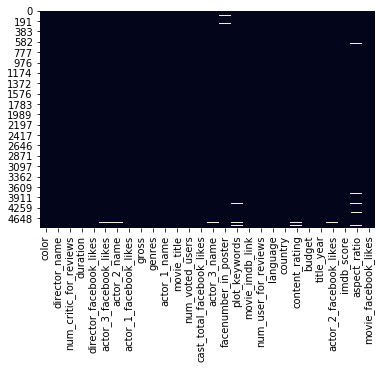

In [11]:
df=df.dropna(axis=0, subset=('gross','budget'))
sns.heatmap(df.isnull(), cbar=False)

* I will replace missing values with zero.

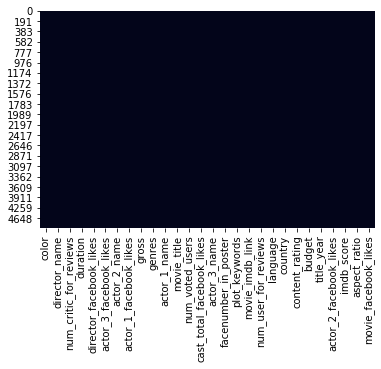

In [12]:
df.fillna(0, inplace=True)
df.isnull().sum()
sns.heatmap(df.isnull(), cbar=False)

* Currently, we does not have missing values, but we need to hand zero values on our data.

## 3.3 Handling zero values

I will remove zeros in the cells except 'facenumber_in_poster'.

In [13]:
df['facenumber_in_poster']=df['facenumber_in_poster'].replace(0,'A')

In [14]:
df=df[(df!= 0)]

In [15]:
df['facenumber_in_poster']=df['facenumber_in_poster'].replace('A',0)

# 4. Business Intelligence

## 4.1 Basic relationship with IMDb score

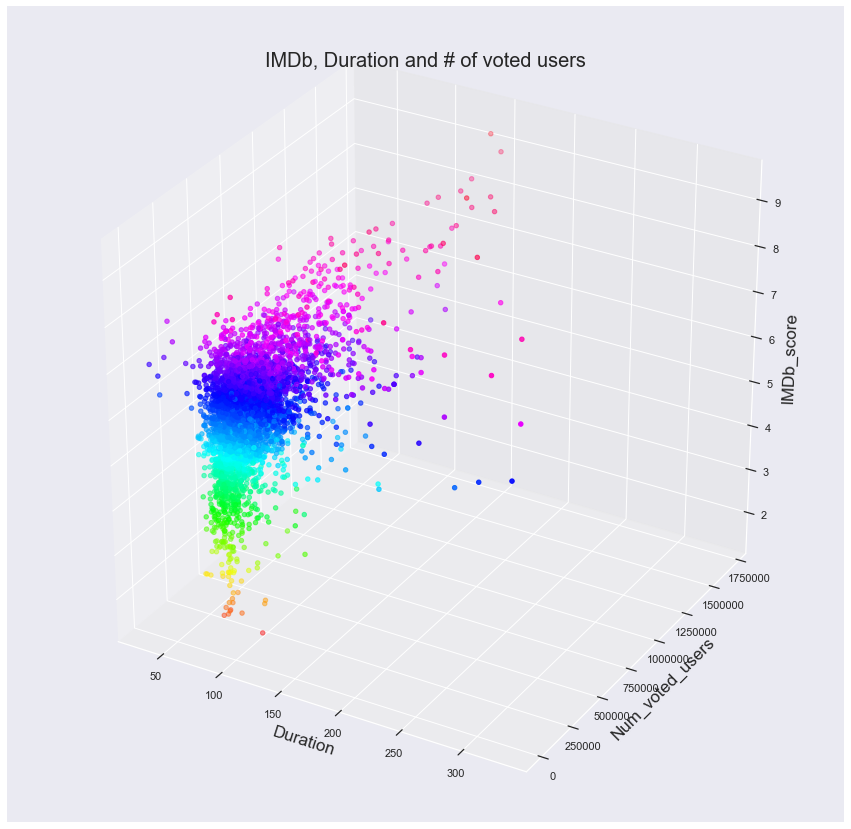

In [17]:
fig = plt.figure()
ax = plt.axes(projection="3d")

z = df['imdb_score']
x = df['duration']
y = df['num_voted_users']

ax.scatter3D(x, y, z, c=z, cmap='hsv');
sns.set(rc={'figure.figsize':(15,15)})

ax.set_xlabel('Duration',fontsize=17)
ax.set_ylabel('Num_voted_users',fontsize=17)
ax.set_zlabel('IMDb_score',fontsize=17)
ax.set_title("IMDb, Duration and # of voted users",fontsize=20)

plt.show()

One interesting fact is that shorter films than longer running times, and those with fewer votes than those with more votes, have higher IMDb scores. For a variety of reasons, people who are disappointed with the film appear to be more active in voting, and long movies are boring and do not appear to have a big impact.

## 4.1 IMDb score vs Country

We can see the country deviations of the IMDB scores. It is interesting to see that North American viewers are a bit skeptical about giving scores. In the case of Japanese, the difference between the highest point and the lowest point was greatest.

Text(0.5, 1.0, 'IMDb score vs country')

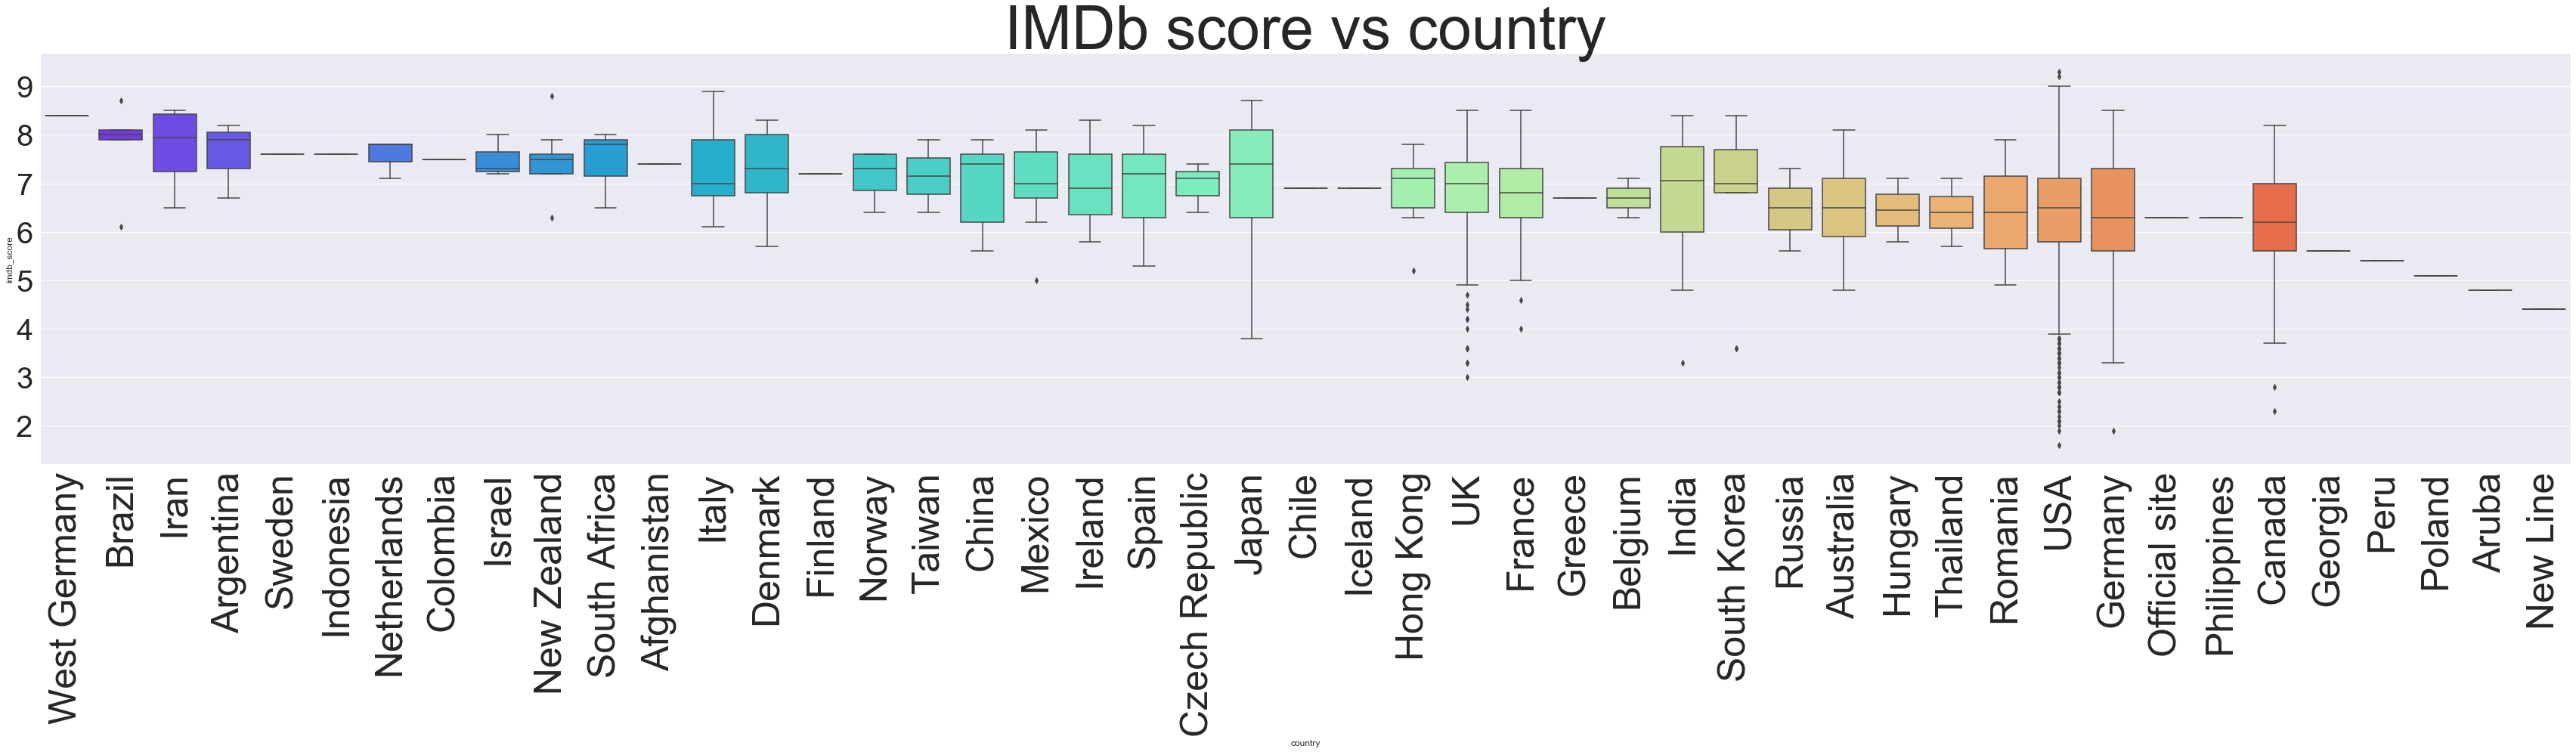

In [19]:
grouped = df.groupby("country")
count_average = pd.DataFrame({col:vals['imdb_score'] for col,vals in grouped}).mean().sort_values(ascending=False)

sns.boxplot(x='country',y='imdb_score',data=df,palette='rainbow',order=count_average.index,)
sns.set(rc={'figure.figsize':(60,10)})
plt.xticks(rotation=90,fontsize=50)
plt.yticks(fontsize=40)
plt.title('IMDb score vs country',fontsize=80)
                                            #Reference: https://stackoverflow.com/questions/40514921/ordering-boxplot-x-axis-in-seaborn

## 4.2 IMDb score vs Movie released year

## Histogram of movie release

In terms of many movie releases by year, most movies were released after 2000.

In [20]:
# Title_year (float -> int)
df1=df
#df['title_year'] = pd.to_numeric(df['title_year'], errors='coerce')
df1['title_year'] = df1['title_year'].astype(int)

Text(0.5, 1.0, 'Histogram of Movie released')

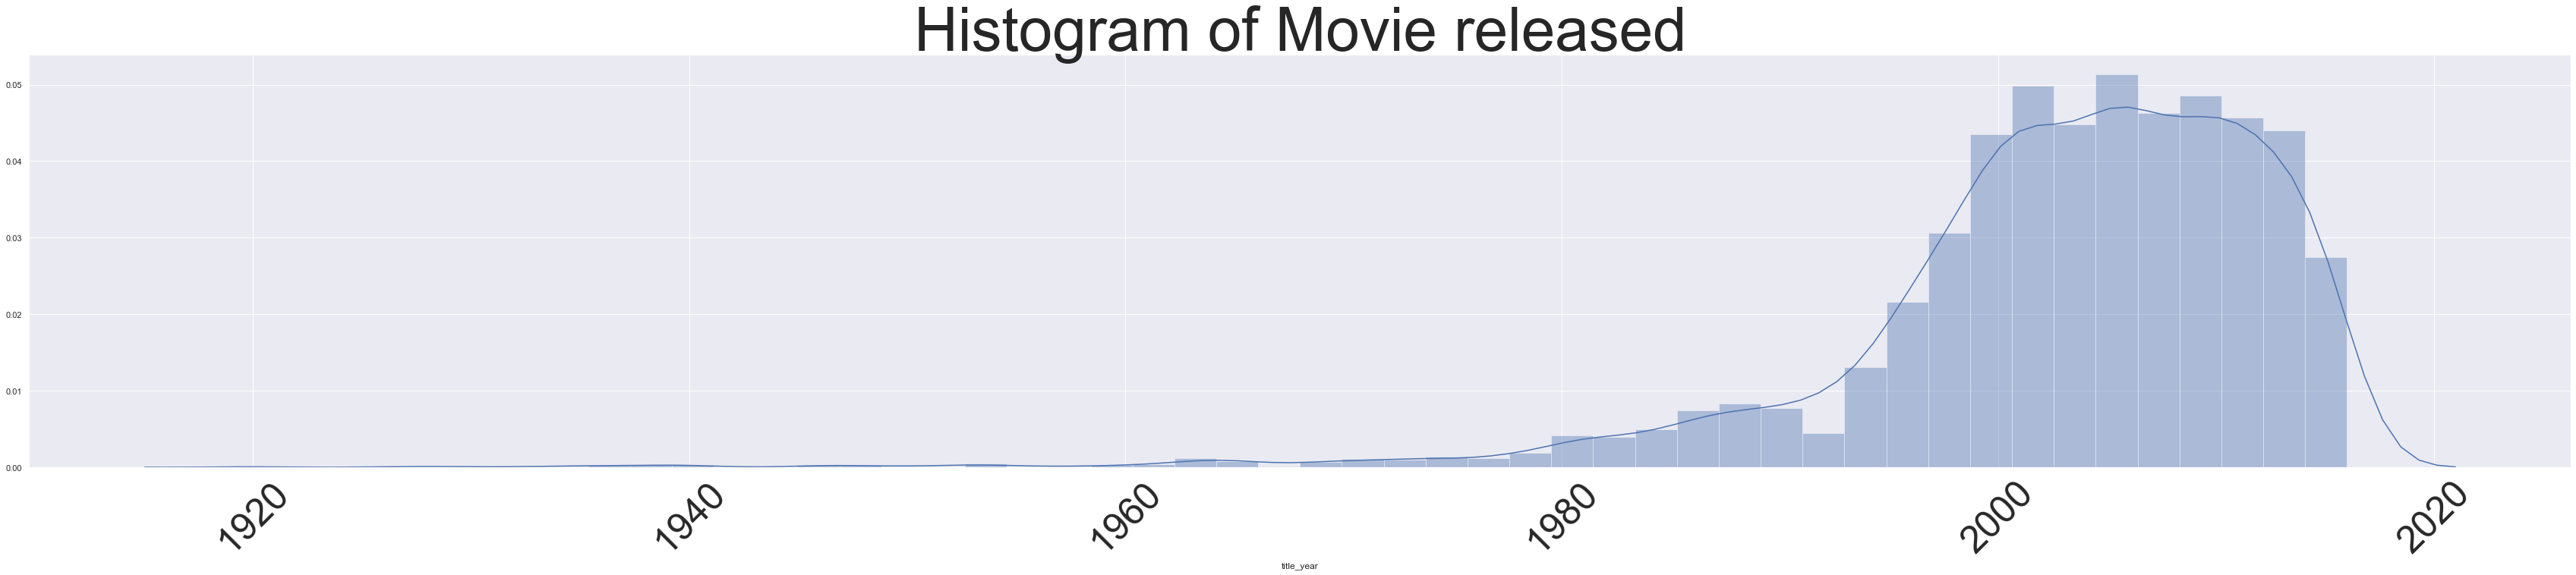

In [21]:
a=df1['title_year']
sns.distplot(a)
plt.xticks(rotation=45,fontsize=50)

plt.title('Histogram of Movie released',fontsize=80)
#Refrence: http://rstudio-pubs-static.s3.amazonaws.com/342210_7c8d57cfdd784cf58dc077d3eb7a2ca3.html

Text(0.5, 1.0, 'IMDb socre vs Release date')

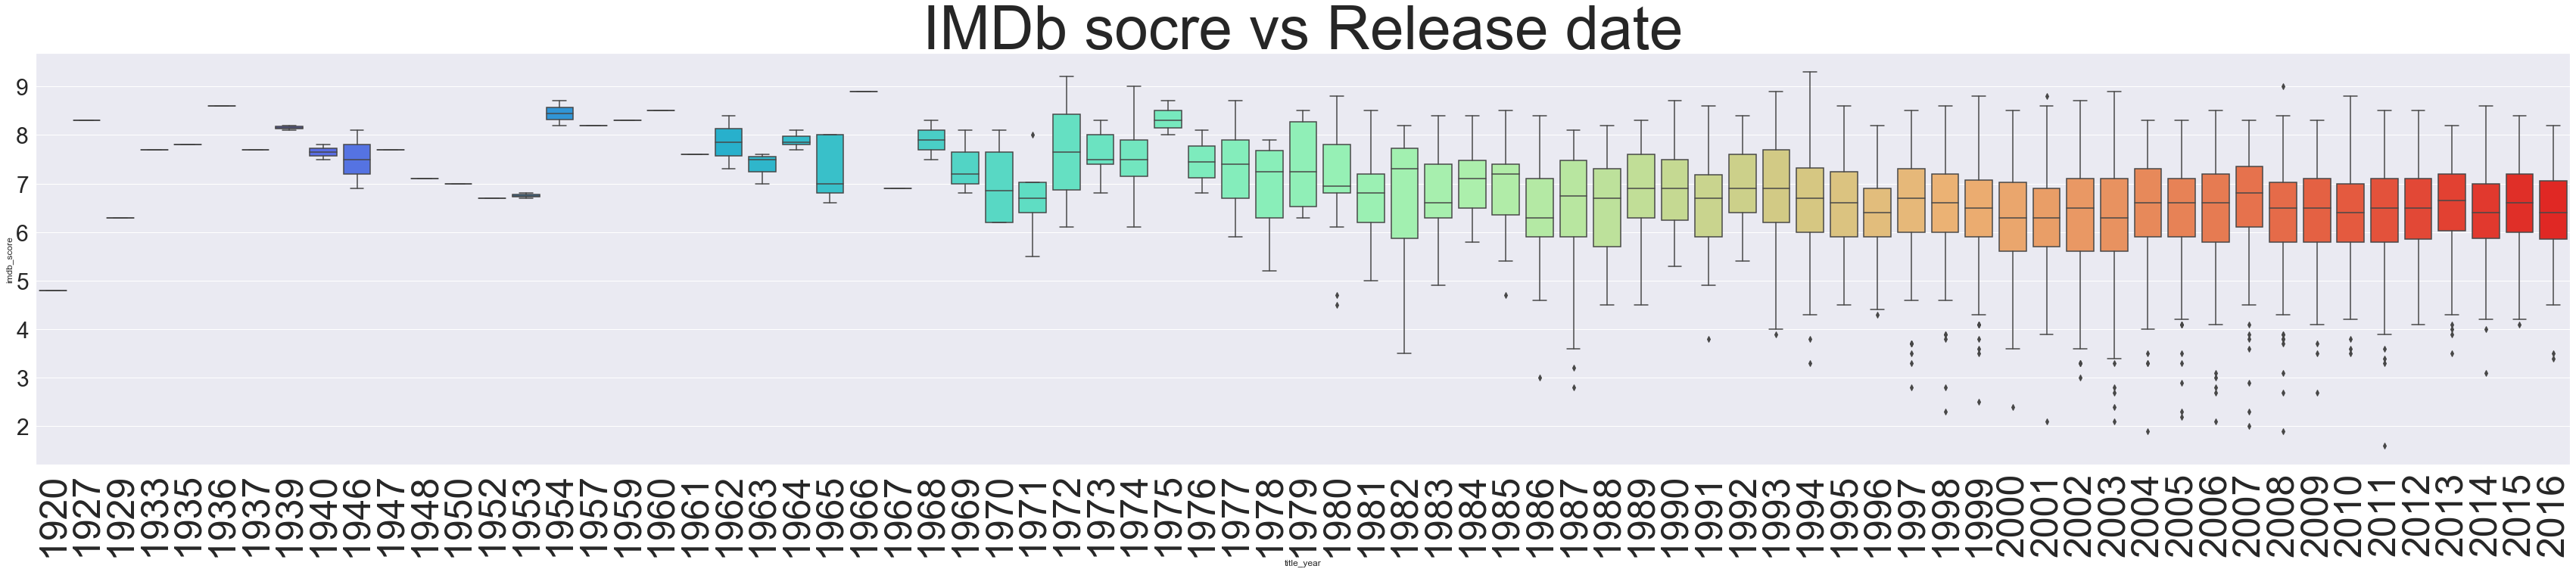

In [22]:
sns.boxplot(x='title_year',y='imdb_score',data=df1,palette='rainbow')
sns.set(rc={'figure.figsize':(60,10)})
plt.xticks(rotation=90,fontsize=50)
plt.yticks(fontsize=30)
plt.title('IMDb socre vs Release date',fontsize=80)

Although many movies have been released since 2000, not all movies are well received. As we can see from the graph, we have seen a lot of lower-rated movies, which tend to lower the average score slightly.

## 4.3 IMDb score vs Director vs Lead actor

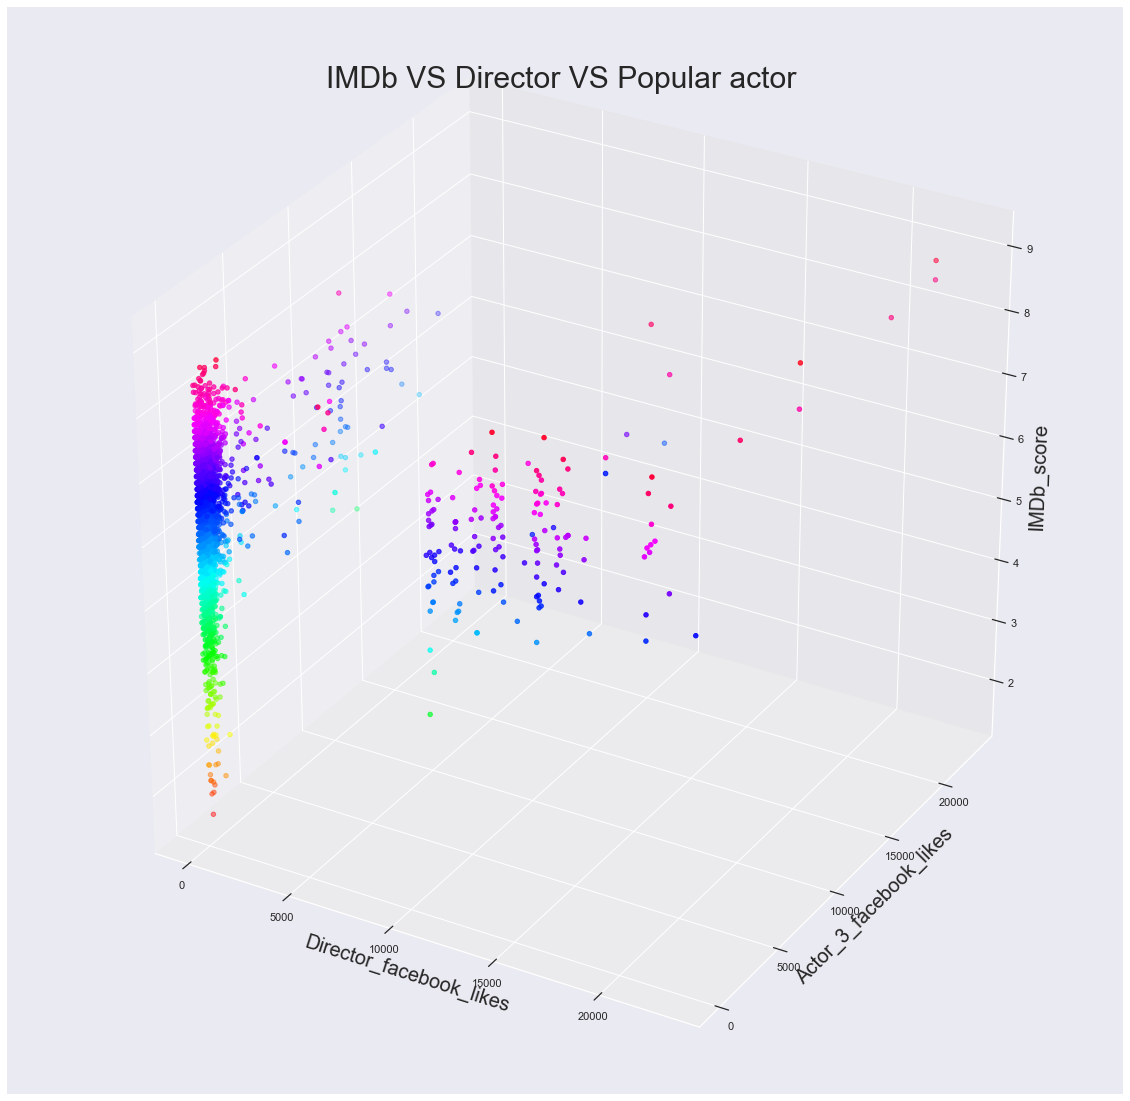

In [24]:
fig = plt.figure()
ax = plt.axes(projection="3d")

z = df['imdb_score']
x = df['director_facebook_likes']
y = df['actor_3_facebook_likes']

ax.scatter3D(x, y, z, c=z, cmap='hsv');
sns.set(rc={'figure.figsize':(20,20)})

ax.set_xlabel('Director_facebook_likes',fontsize=20)
ax.set_ylabel('Actor_3_facebook_likes',fontsize=20)
ax.set_zlabel('IMDb_score',fontsize=20)
ax.set_title("IMDb VS Director VS Popular actor ", fontsize=30)

plt.show()

Popular actors and directors have been shown to have almost the same impact on IMDb scores. People don't like Director, but they appear to like the movie they made. Just as many Facebook likes have been gained by popular actors, IMDb scores also appear to be good.

## 4.4 Who is an influencer?

Text(0.5, 1.0, 'Dierctor vs IMDB')

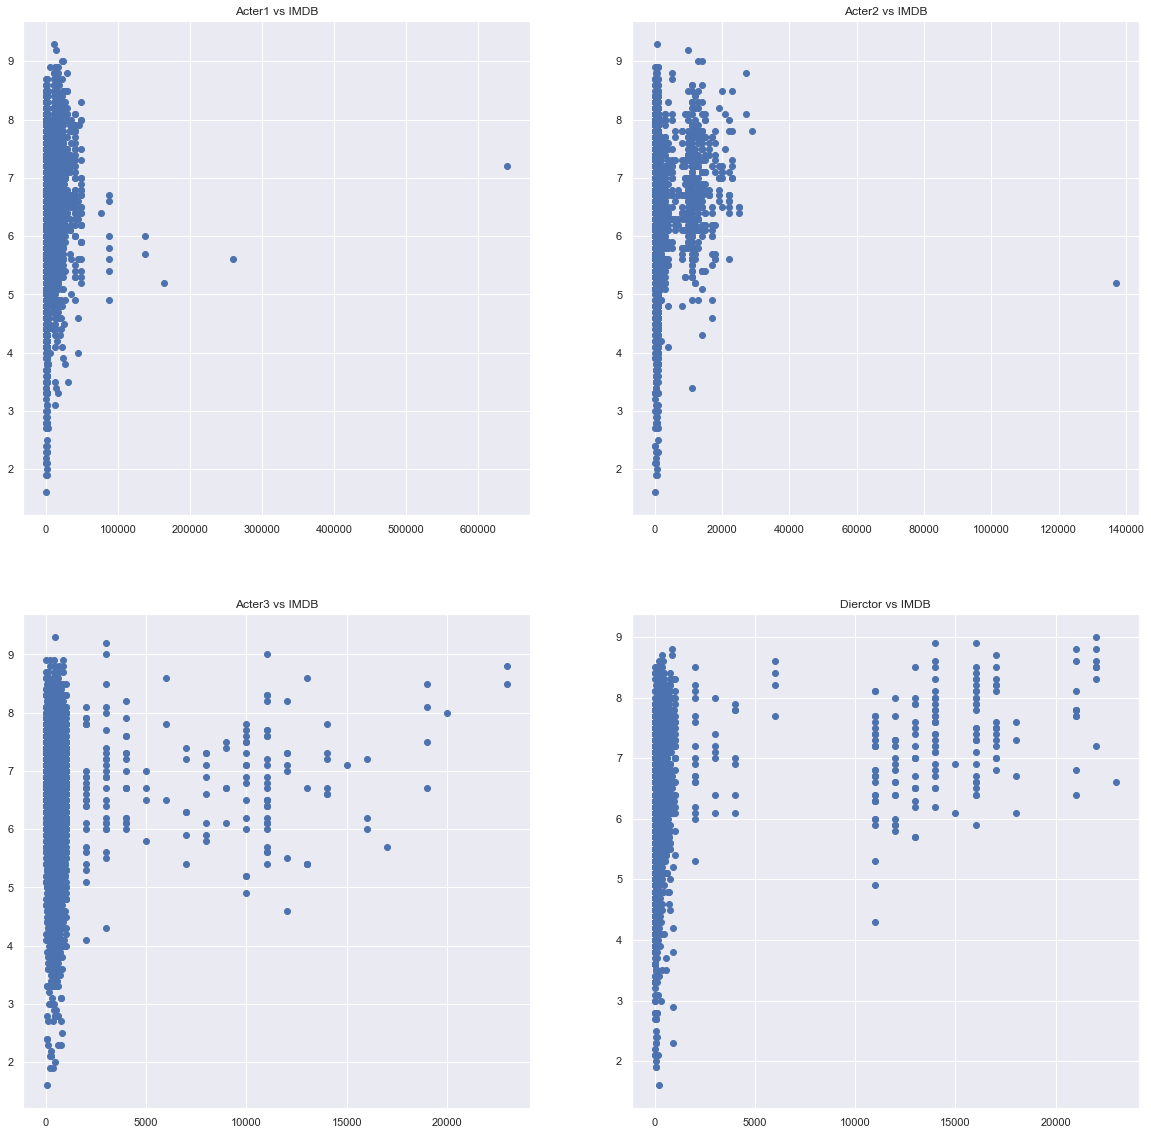

In [25]:
y=df1['imdb_score']
x1=df1['actor_1_facebook_likes']
x2=df1['actor_2_facebook_likes']
x3=df1['actor_3_facebook_likes']
x4=df1['director_facebook_likes']

f, axarr = plt.subplots(2, 2)

axarr[0, 0].scatter(x1, y)
axarr[0, 0].set_title('Acter1 vs IMDB')
axarr[0, 1].scatter(x2, y)
axarr[0, 1].set_title('Acter2 vs IMDB')
axarr[1, 0].scatter(x3, y)
axarr[1, 0].set_title('Acter3 vs IMDB')
axarr[1, 1].scatter(x4,y )
axarr[1, 1].set_title('Dierctor vs IMDB')

Most IMDb scores are not affected by actor1, actor2. The most interesting thing is that actor1 has the least effect. This may be due to a lack of acting skills or just having a popularity.

## 4.5 IMDb VS Critics VS Users

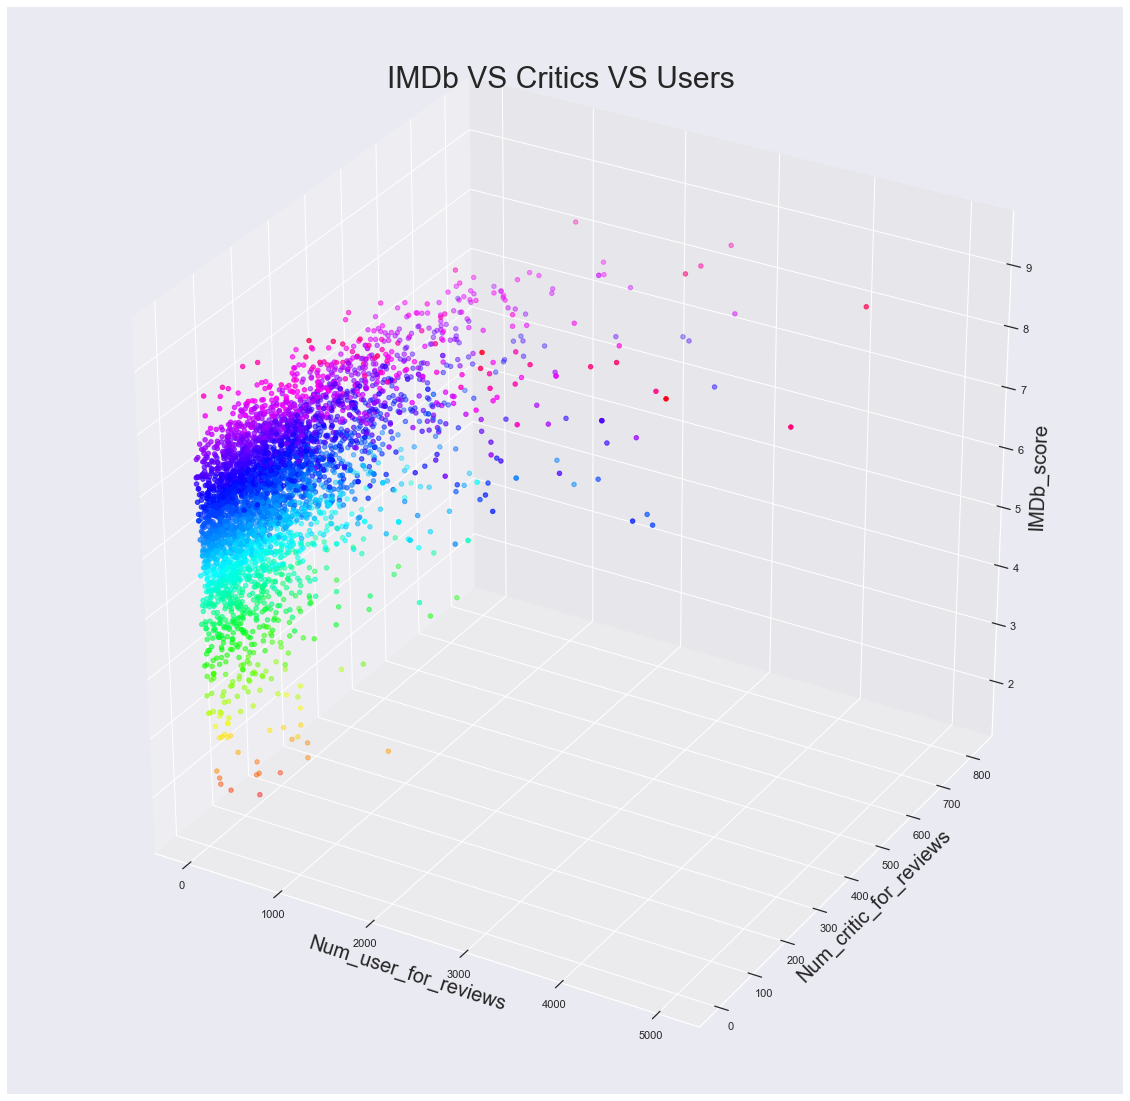

In [26]:
fig = plt.figure()
ax = plt.axes(projection="3d")

z = df['imdb_score']
x = df['num_user_for_reviews']
y = df['num_critic_for_reviews']

ax.scatter3D(x, y, z, c=z, cmap='hsv');
sns.set(rc={'figure.figsize':(20,20)})

ax.set_xlabel('Num_user_for_reviews',fontsize=20)
ax.set_ylabel('Num_critic_for_reviews',fontsize=20)
ax.set_zlabel('IMDb_score',fontsize=20)
ax.set_title("IMDb VS Critics VS Users ", fontsize=30)

plt.show()

The evaluation of User and Critics on IMDb scores showed that most of the Critic gave a variety rating as expected. Relatively many users use the service with a little rating. While the numbers are small, users are relatively gentle in scores, while critics can say that scores are concentrated in the mean and many critics have scored low. It is suggested that the score of IMDb is mainly rated by critics, which may be different from the perspective of users.

# 5. Correlation anlysis

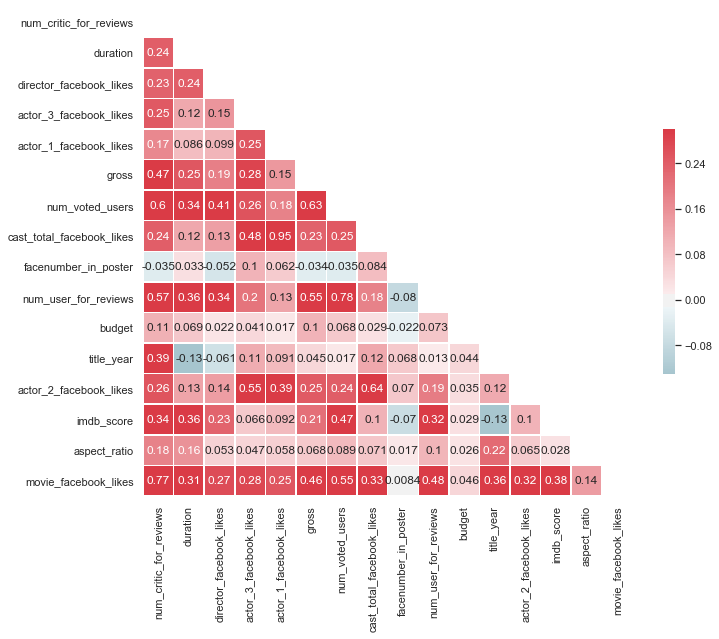

In [27]:
sns.set(style="white")
# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

The results of the correlation analysis are making up the missing points of the previous business analysis, but also confirm the existing data analysis results. The most interesting aspect of the correlation study is that a large number of figures in a movie poster is counterproductive and that older movies don't like people. The number of characters on the poster is an old movie poster style, which people can interpret as not like the old movie style.

# 6. Regression analysis

## 6.1 Model validation and evaluation

In [28]:
df=df.fillna(0)

In [29]:
# declare X variables and y variable

Y = df['imdb_score']
X = df[['num_voted_users','num_critic_for_reviews','num_user_for_reviews','duration','facenumber_in_poster','gross',
        'movie_facebook_likes','director_facebook_likes','cast_total_facebook_likes','budget','title_year']]


print(Y.shape, X.shape)

(3857,) (3857, 11)


In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(3085, 11)
(772, 11)
(3085,)
(772,)


In [31]:
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [32]:
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 0.8586907080496512
R2 score is 0.33577975597162435


The model performance for testing set
--------------------------------------
RMSE is 0.8589932070275852
R2 score is 0.3340706276054529


## 6.2 Ordinary Least Square regression

Regression using OLS resulted in a coefficient value near zero, even though the P-value was significant. In this regression, it seems complicated to find a meaningful interpretation.

In [33]:
m = ols('imdb_score ~ num_voted_users + num_critic_for_reviews + num_user_for_reviews + duration + facenumber_in_poster + gross + movie_facebook_likes + director_facebook_likes + cast_total_facebook_likes + budget + title_year',df).fit()
print(m.summary())


                            OLS Regression Results                            
Dep. Variable:             imdb_score   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.336
Method:                 Least Squares   F-statistic:                     178.3
Date:                Tue, 10 Dec 2019   Prob (F-statistic):               0.00
Time:                        16:25:39   Log-Likelihood:                -4879.4
No. Observations:                3857   AIC:                             9783.
Df Residuals:                    3845   BIC:                             9858.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

## 6.2.1 Multicolinearity check

* The X variables are highly correlated.

In [34]:
print(np.linalg.cond(m.model.exog))

53909504249.5152


We may consider advanced regression techniques such as lasso to deal with multicollinearity. lasso removes highly correlated variables from the model. This is called "feature selection in regression. This type of regression helps develop simple or parsimonious models.

So let's use the latest advanced regression methods.

## 6.3 Lasso regression

In [35]:
# Fit the model below
model1 =  linear_model.Lasso(alpha=0.1)            #higher alpha (penality parameter), fewer predictors
model1.fit(X, Y)
model1_y = model1.predict(X)

In [36]:
print('Coefficients: ', model1.coef_)
print("y-intercept ", model1.intercept_)

Coefficients:  [ 3.78696342e-06  2.35937740e-03 -5.98084732e-04  9.79986561e-03
 -5.42484297e-03 -2.40608639e-09 -2.05360135e-06  3.84745278e-06
 -8.29855101e-07 -3.99509135e-11 -1.92847957e-02]
y-intercept  43.59604786169685


In [37]:
coef = ["%.3f" % i for i in model1.coef_]
xcolumns = [ i for i in X.columns ]
list(zip(xcolumns, coef))

[('num_voted_users', '0.000'),
 ('num_critic_for_reviews', '0.002'),
 ('num_user_for_reviews', '-0.001'),
 ('duration', '0.010'),
 ('facenumber_in_poster', '-0.005'),
 ('gross', '-0.000'),
 ('movie_facebook_likes', '-0.000'),
 ('director_facebook_likes', '0.000'),
 ('cast_total_facebook_likes', '-0.000'),
 ('budget', '-0.000'),
 ('title_year', '-0.019')]

* From Lasso regression, we need to remove 'num_voted_users', 'gross', 'movie_facebook_likes', 'director_facebook_likes', 'cast_total_facebook_likes', and 'budget'. Recently released movies tend to have a lower IMDb. It is interesting to note that 'duration' is weakly associated with the IMDb score.

In [38]:
print("mean square error: ", mean_squared_error(Y, model1_y))
print("variance or r-squared: ", explained_variance_score(Y, model1_y))

mean square error:  0.7376489734832966
variance or r-squared:  0.33544475136294183


Lasso regression also doesn't seem to deal much with the problem of Multicollinearity. Since the coefficients of many variables are near zero, it is reasonable to try other regression methods as well.

## 6.4 f_regression

In [39]:
X_new = SelectKBest(f_regression, k=2).fit_transform(X, Y)
X_new

array([[8.86204e+05, 1.78000e+02],
       [4.71220e+05, 1.69000e+02],
       [2.75868e+05, 1.48000e+02],
       ...,
       [5.20550e+04, 8.10000e+01],
       [1.33800e+03, 9.50000e+01],
       [4.28500e+03, 9.00000e+01]])

In [40]:
# this helps us find out which variables are selected

selector = SelectKBest(f_regression, k=2).fit(X, Y)
idxs_selected = selector.get_support(indices=True)
print(idxs_selected)

[0 3]


In [41]:
X.head(2)

num_voted_users  num_critic_for_reviews  num_user_for_reviews  duration  \
0           886204                   723.0                3054.0     178.0   
1           471220                   302.0                1238.0     169.0   

   facenumber_in_poster        gross  movie_facebook_likes  \
0                   0.0  760505847.0               33000.0   
1                   0.0  309404152.0                   0.0   

   director_facebook_likes  cast_total_facebook_likes       budget  title_year  
0                      0.0                     4834.0  237000000.0        2009  
1                    563.0                    48350.0  300000000.0        2007

* From the f_Regression to select 2 variables, 'num_voted_users' and 'duration' should be selected. 

In [42]:
model2 = lm.LinearRegression()
model2.fit(X_new, Y)
model2_y = model2.predict(X_new)

print("mean square error: ", mean_squared_error(Y, model2_y))
print("variance or r-squared: ", explained_variance_score(Y, model2_y))

mean square error:  0.812333556658996
variance or r-squared:  0.2681606724502962


In [43]:
# use f_regression with k = 3 and develop a new regression model

X_new1 = SelectKBest(f_regression, k=3).fit_transform(X, Y)
X_new1

array([[8.86204e+05, 7.23000e+02, 1.78000e+02],
       [4.71220e+05, 3.02000e+02, 1.69000e+02],
       [2.75868e+05, 6.02000e+02, 1.48000e+02],
       ...,
       [5.20550e+04, 5.60000e+01, 8.10000e+01],
       [1.33800e+03, 1.40000e+01, 9.50000e+01],
       [4.28500e+03, 4.30000e+01, 9.00000e+01]])

In [44]:
selector1 = SelectKBest(f_regression, k=3).fit(X, Y)
idxs_selected1 = selector1.get_support(indices=True)
print(idxs_selected1)

[0 1 3]


* From the f_Regression to select 3 variables, 'num_voted_users','num_critic_for_reviews',and 'duration' should be selected.

In [45]:
model3 = lm.LinearRegression()
model3.fit(X_new1, Y)
model3_y = model3.predict(X_new1)

print("mean square error: ", mean_squared_error(Y, model3_y))
print("variance or r-squared: ", explained_variance_score(Y, model3_y))

mean square error:  0.8078226257774054
variance or r-squared:  0.2722246146522953


## 6.5 Random Forest

In [46]:
regr = RandomForestRegressor(n_estimators=100, random_state=0)
regr.fit(X, Y)
regr_predicted = regr.predict(X)

print("mean square error: ", mean_squared_error(Y, regr_predicted))
print("variance or r-squared: ", explained_variance_score(Y, regr_predicted))

mean square error:  0.06885486440238535
variance or r-squared:  0.9380004331225471


In [47]:
sorted(zip(regr.feature_importances_, X.columns))

[(0.02153073336693109, 'facenumber_in_poster'),
 (0.03498975456606211, 'movie_facebook_likes'),
 (0.041105740442505964, 'director_facebook_likes'),
 (0.048947910612508624, 'title_year'),
 (0.05831765923789544, 'num_critic_for_reviews'),
 (0.06550496283817801, 'cast_total_facebook_likes'),
 (0.07559843806072548, 'num_user_for_reviews'),
 (0.07968767358803375, 'gross'),
 (0.1213016243235193, 'duration'),
 (0.12320867430828583, 'budget'),
 (0.32980682865535443, 'num_voted_users')]

In [48]:
feature_importances = pd.DataFrame(regr.feature_importances_, index = X.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)

feature_importances

importance
num_voted_users              0.329807
budget                       0.123209
duration                     0.121302
gross                        0.079688
num_user_for_reviews         0.075598
cast_total_facebook_likes    0.065505
num_critic_for_reviews       0.058318
title_year                   0.048948
director_facebook_likes      0.041106
movie_facebook_likes         0.034990
facenumber_in_poster         0.021531

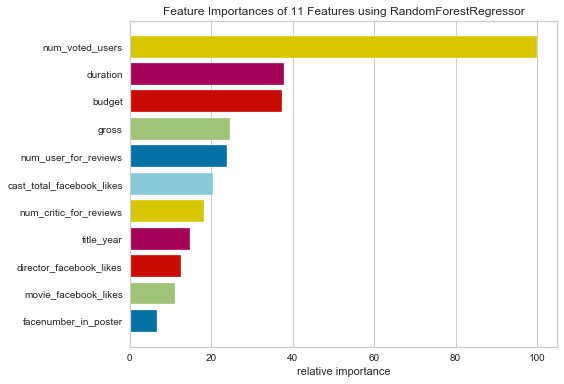

In [49]:
from yellowbrick.model_selection import FeatureImportances
fig = plt.figure()
ax = fig.add_subplot()

viz = FeatureImportances(RandomForestRegressor(n_estimators=100), ax=ax)
viz.fit(X, Y)
viz.poof()

* From RandomForestRegression for Feature Selection, I need to choose 'num_voted_users', 'duration',and'budget'.

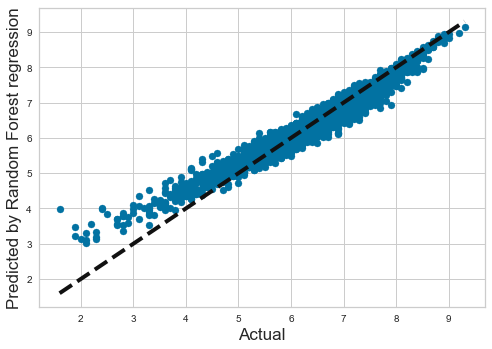

In [50]:
plt.subplots()
plt.scatter(Y, regr_predicted)
plt.plot([Y.min(), Y.max()], [Y.min(), Y.max()], 'k--', lw=4)   #dotted line represents perfect prediction (actual = predicted)
plt.xlabel('Actual', fontsize=17)
plt.ylabel('Predicted by Random Forest regression', fontsize=17)
plt.show()

* Lasso regression, f_regression, and Random forest regression were used to find the variables that most influence IMDB scores. Each regression method showed different performances but found that the 'num_voted_users' variable was the most critical.

* The best model is Random Forest model becuase the lowest mean squared error value as 0.06885486440238535. 

# 7. Classification analysis

* Classification enables us to understand the relationships between things that may not be visible when looking at them as a whole. Many variables may affect how a movie score in a real-world setting and classifying those variables allows us to evaluate which ones have the most significant impact, and which can be controlled. 

* Create categorical column using 'imdb_score'. New variable is 'binning' with 4 categories. 

In [51]:
df.loc[(df['imdb_score'] >= 0) & (df['imdb_score'] < 4), 'binning'] = 'Bad'
df.loc[(df['imdb_score'] >= 4) & (df['imdb_score'] < 6), 'binning'] = 'OK'
df.loc[(df['imdb_score'] >= 6) & (df['imdb_score'] < 8), 'binning'] = 'Good'
df.loc[(df['imdb_score'] >= 8) & (df['imdb_score'] <= 10), 'binning'] = 'Excellent'
df.head(2)

color   director_name  num_critic_for_reviews  duration  \
0  Color   James Cameron                   723.0     178.0   
1  Color  Gore Verbinski                   302.0     169.0   

   director_facebook_likes  actor_3_facebook_likes      actor_2_name  \
0                      0.0                   855.0  Joel David Moore   
1                    563.0                  1000.0     Orlando Bloom   

   actor_1_facebook_likes        gross                           genres  \
0                  1000.0  760505847.0  Action|Adventure|Fantasy|Sci-Fi   
1                 40000.0  309404152.0         Action|Adventure|Fantasy   

  actor_1_name                                movie_title  num_voted_users  \
0  CCH Pounder                                    Avatar            886204   
1  Johnny Depp  Pirates of the Caribbean: At World's End            471220   

   cast_total_facebook_likes    actor_3_name  facenumber_in_poster  \
0                     4834.0       Wes Studi                   0.0   
1                    48350.0  Jack Davenport                   0.0   

                                       plot_keywords  \
0             avatar|future|marine|native|paraplegic   
1  goddess|marriage ceremony|marriage proposal|pi...   

                                     movie_imdb_link  num_user_for_reviews  \
0  http://www.imdb.com/title/tt0499549/?ref_=fn_t...                3054.0   
1  http://www.imdb.com/title/tt0449088/?ref_=fn_t...                1238.0   

  language country content_rating       budget  title_year  \
0  English     USA          PG-13  237000000.0        2009   
1  English     USA          PG-13  300000000.0        2007   

   actor_2_facebook_likes  imdb_score  aspect_ratio  movie_facebook_likes  \
0                   936.0         7.9          1.78               33000.0   
1                  5000.0         7.1          2.35                   0.0   

  binning  
0    Good  
1    Good

* Most count on Country is USA, so I will remove country variable on calssification analysis.

In [52]:
df['country'].value_counts().head(5)

USA        3047
UK          320
France      106
Germany      81
Canada       64
Name: country, dtype: int64

* Categorization on 'content_rating'

In [53]:
df['content_rating'].value_counts()

R            1723
PG-13        1314
PG            573
G              91
0              51
Not Rated      42
Unrated        24
Approved       17
X              10
NC-17           6
Passed          3
M               2
GP              1
Name: content_rating, dtype: int64

In [54]:
df.loc[(df['content_rating'] =='R' , 'content')] = '0'
df.loc[(df['content_rating'] =='PG-13' , 'content')] = '1'
df.loc[(df['content_rating'] =='PG' , 'content')] = '2'
df.loc[(df['content_rating'] =='G' , 'content')] = '3'
df.loc[(df['content_rating'] == 0 , 'content')] = '4'
df.loc[(df['content_rating'] =='Not Rated' , 'content')] = '5'
df.loc[(df['content_rating'] =='Unrated' , 'content')] = '6'
df.loc[(df['content_rating'] =='Approved' , 'content')] = '7'
df.loc[(df['content_rating'] =='X' , 'content')] = '8'
df.loc[(df['content_rating'] =='NC-17' , 'content')] = '9'
df.loc[(df['content_rating'] =='Passed' , 'content')] = '10'
df.loc[(df['content_rating'] =='M' , 'content')] = '11'
df.loc[(df['content_rating'] =='GP' , 'content')] = '12'

In [55]:
# declare X variables and y variable

y = df['binning']
X = df[['budget','gross','num_voted_users','num_critic_for_reviews','movie_facebook_likes','director_facebook_likes',
       'actor_1_facebook_likes','actor_2_facebook_likes','actor_3_facebook_likes','duration','facenumber_in_poster',
       'title_year','content']]
print(y.shape, X.shape)

(3857,) (3857, 13)


## 7.1 Descision tree

In [88]:
# split validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Initialize DecisionTreeClassifier() ... name your decision model "
dt = DecisionTreeClassifier()
# Train a decision tree model
dt = dt.fit(X_train, y_train)
dt

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [89]:
#Model evaluation
# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, dt.predict(X_test)))
print("--------------------------------------------------------")
print(metrics.confusion_matrix(y_test, dt.predict(X_test))) 
print("--------------------------------------------------------")
print(metrics.classification_report(y_test, dt.predict(X_test)))

Accuracy: 0.6580310880829016
--------------------------------------------------------
[[  1   0  11  17]
 [  0  43  25   3]
 [ 14  30 578 147]
 [ 12   0 137 140]]
--------------------------------------------------------
              precision    recall  f1-score   support

         Bad       0.04      0.03      0.04        29
   Excellent       0.59      0.61      0.60        71
        Good       0.77      0.75      0.76       769
          OK       0.46      0.48      0.47       289

    accuracy                           0.66      1158
   macro avg       0.46      0.47      0.47      1158
weighted avg       0.66      0.66      0.66      1158



In [90]:
# Create DOT data
dot_data = tree.export_graphviz(dt, out_file=None, 
                                feature_names=X.columns,  
                                filled=True, rounded=True, special_characters=True)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data) 

from IPython.display import Image  

# Show graph
Image(graph.create_png())

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.921068 to fit



In [91]:
# Create PDF
graph.write_pdf("C:/Users/SangSuHa/Desktop/DA665/Mid_term_project/dt.pdf")
                

True

## 7.2 K-Nearest Neighbors (KNN)

In [84]:
# evaluate the model by splitting into train and test sets & develop knn model (name it as knn)
# split validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [85]:
# http://scikit-learn.org/stable/modules/model_evaluation.html
print("Accuracy:",metrics.accuracy_score(y_test, knn.predict(X_test)))
print("--------------------------------------------------------")
print(metrics.confusion_matrix(y_test, knn.predict(X_test))) 
print("--------------------------------------------------------")
print(metrics.classification_report(y_test, knn.predict(X_test)))

Accuracy: 0.6105354058721935
--------------------------------------------------------
[[  0   0  19   7]
 [  0   4  61   5]
 [  5  12 646  94]
 [  1   2 245  57]]
--------------------------------------------------------
              precision    recall  f1-score   support

         Bad       0.00      0.00      0.00        26
   Excellent       0.22      0.06      0.09        70
        Good       0.67      0.85      0.75       757
          OK       0.35      0.19      0.24       305

    accuracy                           0.61      1158
   macro avg       0.31      0.27      0.27      1158
weighted avg       0.54      0.61      0.56      1158



In [86]:
#create a dictionary of all values we want to test for n_neighbors
params_knn = {'n_neighbors': np.arange(1, 25)}

#use gridsearch to test all values for n_neighbors
knn_gs = GridSearchCV(knn, params_knn, cv=3, iid=False)

#fit model to training data
knn_gs.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid=False, n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [87]:
#save best model
knn_best = knn_gs.best_estimator_

#check best n_neigbors value
print(knn_gs.best_score_)
print(knn_gs.best_params_)
print(knn_gs.best_estimator_)

0.6665416980573612
{'n_neighbors': 22}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=22, p=2,
                     weights='uniform')


## 7.3 Logistic regression

In [92]:
# evaluate the model by splitting into train and test sets and build a logistic regression model
# name it as "lr"

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
lr = LogisticRegression(solver='lbfgs', max_iter=500)
lr.fit(X_train, y_train)

C:\Users\SangSuHa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning:

Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [93]:
#Model evaluation

print("Accuracy:",metrics.accuracy_score(y_test, lr.predict(X_test)))
print("--------------------------------------------------------")
print(metrics.confusion_matrix(y_test, lr.predict(X_test)))
print("--------------------------------------------------------")
print(metrics.classification_report(y_test, lr.predict(X_test)))

Accuracy: 0.6770293609671848
--------------------------------------------------------
[[  0   0  26   0]
 [  0  27  43   0]
 [  0   0 757   0]
 [  0   0 305   0]]
--------------------------------------------------------
              precision    recall  f1-score   support

         Bad       0.00      0.00      0.00        26
   Excellent       1.00      0.39      0.56        70
        Good       0.67      1.00      0.80       757
          OK       0.00      0.00      0.00       305

    accuracy                           0.68      1158
   macro avg       0.42      0.35      0.34      1158
weighted avg       0.50      0.68      0.56      1158



C:\Users\SangSuHa\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.



## 7.4 Random Forest Classifier

In [94]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=20)    #building 20 decision trees
clf=clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7547495682210709

In [95]:
# generate evaluation metrics
print("Accuracy:", metrics.accuracy_score(y_test, clf.predict(X_test))) #overall accuracy
print("--------------------------------------------------------")
print(metrics.confusion_matrix(y_test, clf.predict(X_test)))
print("--------------------------------------------------------")
print(metrics.classification_report(y_test, clf.predict(X_test)))

Accuracy: 0.7547495682210709
--------------------------------------------------------
[[  0   0  14  12]
 [  0  33  37   0]
 [  0   1 714  42]
 [  1   0 177 127]]
--------------------------------------------------------
              precision    recall  f1-score   support

         Bad       0.00      0.00      0.00        26
   Excellent       0.97      0.47      0.63        70
        Good       0.76      0.94      0.84       757
          OK       0.70      0.42      0.52       305

    accuracy                           0.75      1158
   macro avg       0.61      0.46      0.50      1158
weighted avg       0.74      0.75      0.73      1158



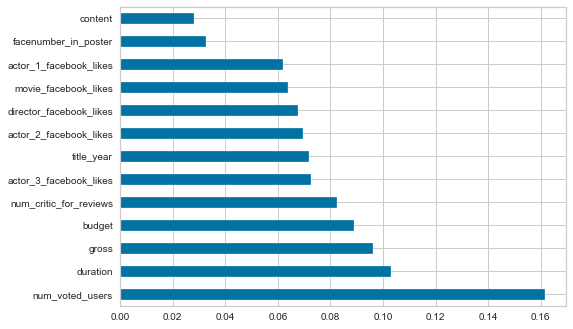

In [103]:
pd.DataFrame(clf.feature_importances_, index = X.columns,
                                    columns=['importance']).sort_values('importance', ascending=False).plot(kind='barh', 
                                                                                                            legend=None);

## 7.5 Support Vector Machine (SVM)

In [96]:
svm = SVC(gamma='scale', probability=True)
svm.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [97]:
#Model evaluation
# http://scikit-learn.org/stable/modules/model_evaluation.html
print("Accuraty:",metrics.accuracy_score(y_test, svm.predict(X_test)))
print("--------------------------------------------------------")
print(metrics.confusion_matrix(y_test, svm.predict(X_test))) 
print("--------------------------------------------------------")
print(metrics.classification_report(y_test, svm.predict(X_test)))

Accuraty: 0.653713298791019
--------------------------------------------------------
[[  0   0  26   0]
 [  0   0  70   0]
 [  0   0 757   0]
 [  0   0 305   0]]
--------------------------------------------------------
              precision    recall  f1-score   support

         Bad       0.00      0.00      0.00        26
   Excellent       0.00      0.00      0.00        70
        Good       0.65      1.00      0.79       757
          OK       0.00      0.00      0.00       305

    accuracy                           0.65      1158
   macro avg       0.16      0.25      0.20      1158
weighted avg       0.43      0.65      0.52      1158



C:\Users\SangSuHa\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.



## 7.6 Gradient Boost Classfier

In [98]:
# split validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
# initialize 
gb = GradientBoostingClassifier(n_estimators=100, random_state=0)

# fit the model
gb.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [99]:
#Model evaluation
# http://scikit-learn.org/stable/modules/model_evaluation.html
print("Accuracy:",metrics.accuracy_score(y_test, gb.predict(X_test)))
print("--------------------------------------------------------")
print(metrics.confusion_matrix(y_test, gb.predict(X_test))) 
print("--------------------------------------------------------")
print(metrics.classification_report(y_test, gb.predict(X_test)))

Accuracy: 0.7469775474956822
--------------------------------------------------------
[[  0   0  11  15]
 [  0  37  33   0]
 [  3   4 687  63]
 [  3   0 161 141]]
--------------------------------------------------------
              precision    recall  f1-score   support

         Bad       0.00      0.00      0.00        26
   Excellent       0.90      0.53      0.67        70
        Good       0.77      0.91      0.83       757
          OK       0.64      0.46      0.54       305

    accuracy                           0.75      1158
   macro avg       0.58      0.47      0.51      1158
weighted avg       0.73      0.75      0.73      1158



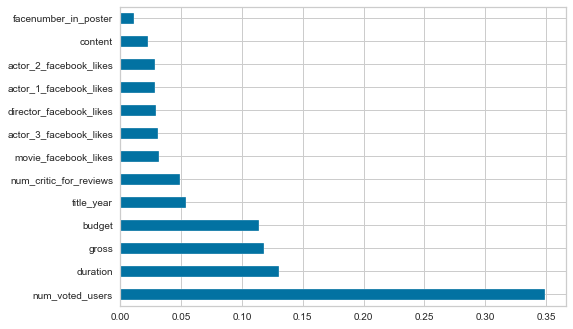

In [100]:
pd.DataFrame(gb.feature_importances_, index = X.columns,
                                    columns=['importance']).sort_values('importance', ascending=False).plot(kind='barh', 
                                                                                                            legend=None);

## 7.7 Neural Network

In [101]:
nn = MLPClassifier(solver='lbfgs', max_iter=500)
nn.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=500, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [102]:
#Model evaluation
# http://scikit-learn.org/stable/modules/model_evaluation.html
print("Accuracy:",metrics.accuracy_score(y_test, nn.predict(X_test)))
print("--------------------------------------------------------")
print(metrics.confusion_matrix(y_test, nn.predict(X_test))) 
print("--------------------------------------------------------")
print(metrics.classification_report(y_test, nn.predict(X_test)))

Accuracy: 0.5233160621761658
--------------------------------------------------------
[[  0   1  14  11]
 [  4  35  25   6]
 [ 14  77 477 189]
 [  2  13 196  94]]
--------------------------------------------------------
              precision    recall  f1-score   support

         Bad       0.00      0.00      0.00        26
   Excellent       0.28      0.50      0.36        70
        Good       0.67      0.63      0.65       757
          OK       0.31      0.31      0.31       305

    accuracy                           0.52      1158
   macro avg       0.32      0.36      0.33      1158
weighted avg       0.54      0.52      0.53      1158



## 7.9 model selection

* Random Forest Classifier and Gradient Boost Classifier are most accurate method, but RFC has slightly higher score.

* 'num_voted_users' is the most important variable for IMDB score. 

# 8. Clustering Analysis

* Cluster analysis is used to classify objects where objects in one group are more related to each other and distinct from objects in different groups. Cluster analysis can be a crucial process to understand the distinct attributes of a large population.

* Remove object columns

In [104]:
df = df.select_dtypes(exclude=['object'])

In [105]:
df.head(2)

num_critic_for_reviews  duration  director_facebook_likes  \
0                   723.0     178.0                      0.0   
1                   302.0     169.0                    563.0   

   actor_3_facebook_likes  actor_1_facebook_likes        gross  \
0                   855.0                  1000.0  760505847.0   
1                  1000.0                 40000.0  309404152.0   

   num_voted_users  cast_total_facebook_likes  facenumber_in_poster  \
0           886204                     4834.0                   0.0   
1           471220                    48350.0                   0.0   

   num_user_for_reviews       budget  title_year  actor_2_facebook_likes  \
0                3054.0  237000000.0        2009                   936.0   
1                1238.0  300000000.0        2007                  5000.0   

   imdb_score  aspect_ratio  movie_facebook_likes  
0         7.9          1.78               33000.0  
1         7.1          2.35                   0.0

## 8.1.1 Performance variance analysis

In [106]:
# variance test

df.var()

num_critic_for_reviews       1.536741e+04
duration                     5.201127e+02
director_facebook_likes      9.156216e+06
actor_3_facebook_likes       3.384228e+06
actor_1_facebook_likes       2.371391e+08
gross                        4.803013e+15
num_voted_users              2.257573e+10
cast_total_facebook_likes    3.578374e+08
facenumber_in_poster         4.221380e+00
num_user_for_reviews         1.663330e+05
budget                       4.986716e+16
title_year                   1.001102e+02
actor_2_facebook_likes       1.997935e+07
imdb_score                   1.110277e+00
aspect_ratio                 2.061162e-01
movie_facebook_likes         4.523229e+08
dtype: float64

## 8.1.2 Normarlize data & Check variance again


In [107]:
# normalize data and save as X
df_norm = (df - df.mean()) / (df.max() - df.min())
df_norm.head()

num_critic_for_reviews  duration  director_facebook_likes  \
0                0.688989  0.206446                -0.034075   
1                0.171153  0.179174                -0.009597   
2                0.540157  0.115537                -0.034075   
3                0.799690  0.164022                 0.922447   
5                0.367955  0.067052                -0.013423   

   actor_3_facebook_likes  actor_1_facebook_likes     gross  num_voted_users  \
0                0.004767               -0.010262  0.933054         0.463904   
1                0.011072                0.050675  0.339894         0.218316   
2               -0.025407                0.005363  0.196135         0.102707   
3                0.967593                0.030363  0.522308         0.616667   
5               -0.009363               -0.010825  0.029120         0.065031   

   cast_total_facebook_likes  facenumber_in_poster  num_user_for_reviews  \
0                  -0.009736             -0.031968              0.539160   
1                   0.056526             -0.031968              0.180196   
2                   0.000719             -0.008713              0.131965   
3                   0.145465             -0.031968              0.469384   
5                  -0.014245             -0.008713              0.081362   

     budget  title_year  actor_2_facebook_likes  imdb_score  aspect_ratio  \
0  0.015701    0.061790               -0.007449    0.186519     -0.018059   
1  0.020859    0.040956                0.022215    0.082623      0.017566   
2  0.016356    0.124290               -0.011412    0.043662      0.017566   
3  0.016765    0.093040                0.153602    0.264441      0.017566   
5  0.017887    0.093040               -0.009668    0.017688      0.017566   

   movie_facebook_likes  
0              0.068534  
1             -0.026022  
2              0.217531  
3              0.443892  
5              0.042746

In [108]:
# variance test again

df_norm.var()

num_critic_for_reviews       0.023250
duration                     0.004776
director_facebook_likes      0.017309
actor_3_facebook_likes       0.006397
actor_1_facebook_likes       0.000579
gross                        0.008304
num_voted_users              0.007907
cast_total_facebook_likes    0.000830
facenumber_in_poster         0.002283
num_user_for_reviews         0.006499
budget                       0.000334
title_year                   0.010863
actor_2_facebook_likes       0.001064
imdb_score                   0.018726
aspect_ratio                 0.000805
movie_facebook_likes         0.003714
dtype: float64

## 8.1.3  Clustering analysis (k = 2): Include "random_state=0"¶

In [109]:
# clustering analysis with k = 2
k_means = KMeans(init='k-means++', n_clusters=2, random_state=0)
k_means.fit(df_norm)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [110]:
#clustering results
k_means.labels_

array([1, 1, 1, ..., 0, 0, 0])

In [111]:
#cluster centroids or centers
k_means.cluster_centers_

array([[-0.0585116 , -0.01062809, -0.01967094, -0.0095607 , -0.0020946 ,
        -0.02195671, -0.02994501, -0.00338075,  0.00081743, -0.0242061 ,
        -0.00092602, -0.01140423, -0.00392975, -0.02803376, -0.00198675,
        -0.01770384],
       [ 0.21873562,  0.0397313 ,  0.07353643,  0.03574105,  0.00783031,
         0.08208141,  0.11194432,  0.01263834, -0.00305582,  0.09049036,
         0.00346178,  0.04263277,  0.01469069,  0.10479943,  0.00742714,
         0.06618279]])

## 8.1.4 Interpretation of Clustering analysis

### How many observations are there in cluster 1 and cluster 2?

In [112]:
# clustering analysis with k = 2
k_means = KMeans(init='k-means++', n_clusters=2, random_state=0)
k_means.fit(df_norm)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [113]:
k_means.labels_

array([1, 1, 1, ..., 0, 0, 0])

In [114]:
#cluster centroids or centers
k_means.cluster_centers_

array([[-0.0585116 , -0.01062809, -0.01967094, -0.0095607 , -0.0020946 ,
        -0.02195671, -0.02994501, -0.00338075,  0.00081743, -0.0242061 ,
        -0.00092602, -0.01140423, -0.00392975, -0.02803376, -0.00198675,
        -0.01770384],
       [ 0.21873562,  0.0397313 ,  0.07353643,  0.03574105,  0.00783031,
         0.08208141,  0.11194432,  0.01263834, -0.00305582,  0.09049036,
         0.00346178,  0.04263277,  0.01469069,  0.10479943,  0.00742714,
         0.06618279]])

In [115]:
#To add cluster label into the dataset as a column
df1 = pd.DataFrame(k_means.labels_, columns = ['cluster'])
df1.head()

cluster
0        1
1        1
2        1
3        1
4        1

In [116]:
df2 = df.join(df1)
df2.head()

num_critic_for_reviews  duration  director_facebook_likes  \
0                   723.0     178.0                      0.0   
1                   302.0     169.0                    563.0   
2                   602.0     148.0                      0.0   
3                   813.0     164.0                  22000.0   
5                   462.0     132.0                    475.0   

   actor_3_facebook_likes  actor_1_facebook_likes        gross  \
0                   855.0                  1000.0  760505847.0   
1                  1000.0                 40000.0  309404152.0   
2                   161.0                 11000.0  200074175.0   
3                 23000.0                 27000.0  448130642.0   
5                   530.0                   640.0   73058679.0   

   num_voted_users  cast_total_facebook_likes  facenumber_in_poster  \
0           886204                     4834.0                   0.0   
1           471220                    48350.0                   0.0   
2           275868                    11700.0                   1.0   
3          1144337                   106759.0                   0.0   
5           212204                     1873.0                   1.0   

   num_user_for_reviews       budget  title_year  actor_2_facebook_likes  \
0                3054.0  237000000.0        2009                   936.0   
1                1238.0  300000000.0        2007                  5000.0   
2                 994.0  245000000.0        2015                   393.0   
3                2701.0  250000000.0        2012                 23000.0   
5                 738.0  263700000.0        2012                   632.0   

   imdb_score  aspect_ratio  movie_facebook_likes  cluster  
0         7.9          1.78               33000.0      1.0  
1         7.1          2.35                   0.0      1.0  
2         6.8          2.35               85000.0      1.0  
3         8.5          2.35              164000.0      1.0  
5         6.6          2.35               24000.0      1.0

In [117]:
df2.tail()


num_critic_for_reviews  duration  director_facebook_likes  \
5033                   143.0      77.0                    291.0   
5034                    35.0      80.0                      0.0   
5035                    56.0      81.0                      0.0   
5037                    14.0      95.0                      0.0   
5042                    43.0      90.0                     16.0   

      actor_3_facebook_likes  actor_1_facebook_likes      gross  \
5033                     8.0                   291.0   424760.0   
5034                     0.0                     0.0    70071.0   
5035                     6.0                   121.0  2040920.0   
5037                   133.0                   296.0     4584.0   
5042                    16.0                    86.0    85222.0   

      num_voted_users  cast_total_facebook_likes  facenumber_in_poster  \
5033            72639                      368.0                   0.0   
5034              589                        0.0                   0.0   
5035            52055                      147.0                   0.0   
5037             1338                      690.0                   1.0   
5042             4285                      163.0                   0.0   

      num_user_for_reviews  budget  title_year  actor_2_facebook_likes  \
5033                 371.0  7000.0        2004                    45.0   
5034                  35.0  7000.0        2005                     0.0   
5035                 130.0  7000.0        1992                    20.0   
5037                  14.0  9000.0        2011                   205.0   
5042                  84.0  1100.0        2004                    23.0   

      imdb_score  aspect_ratio  movie_facebook_likes  cluster  
5033         7.0          1.85               19000.0      NaN  
5034         6.3          0.00                  74.0      NaN  
5035         6.9          1.37                   0.0      NaN  
5037         6.4          0.00                 413.0      NaN  
5042         6.6          1.85                 456.0      NaN

In [118]:
df = df.reset_index(drop=True)
df1 = df1.reset_index(drop=True)

df2 = df.join(df1)
df2.head()

num_critic_for_reviews  duration  director_facebook_likes  \
0                   723.0     178.0                      0.0   
1                   302.0     169.0                    563.0   
2                   602.0     148.0                      0.0   
3                   813.0     164.0                  22000.0   
4                   462.0     132.0                    475.0   

   actor_3_facebook_likes  actor_1_facebook_likes        gross  \
0                   855.0                  1000.0  760505847.0   
1                  1000.0                 40000.0  309404152.0   
2                   161.0                 11000.0  200074175.0   
3                 23000.0                 27000.0  448130642.0   
4                   530.0                   640.0   73058679.0   

   num_voted_users  cast_total_facebook_likes  facenumber_in_poster  \
0           886204                     4834.0                   0.0   
1           471220                    48350.0                   0.0   
2           275868                    11700.0                   1.0   
3          1144337                   106759.0                   0.0   
4           212204                     1873.0                   1.0   

   num_user_for_reviews       budget  title_year  actor_2_facebook_likes  \
0                3054.0  237000000.0        2009                   936.0   
1                1238.0  300000000.0        2007                  5000.0   
2                 994.0  245000000.0        2015                   393.0   
3                2701.0  250000000.0        2012                 23000.0   
4                 738.0  263700000.0        2012                   632.0   

   imdb_score  aspect_ratio  movie_facebook_likes  cluster  
0         7.9          1.78               33000.0        1  
1         7.1          2.35                   0.0        1  
2         6.8          2.35               85000.0        1  
3         8.5          2.35              164000.0        1  
4         6.6          2.35               24000.0        1

In [119]:
df2.groupby('cluster').mean()

num_critic_for_reviews    duration  director_facebook_likes  \
cluster                                                                
0                    115.282287  106.365429               331.289517   
1                    340.684275  122.984029              2475.058968   

         actor_3_facebook_likes  actor_1_facebook_likes         gross  \
cluster                                                                 
0                    525.456457             6227.157410  3.421444e+07   
1                   1567.396806            12579.103194  1.133360e+08   

         num_voted_users  cast_total_facebook_likes  facenumber_in_poster  \
cluster                                                                     
0           51718.232008                9007.587907              1.409793   
1          291477.009828               19527.800983              1.243243   

         num_user_for_reviews        budget   title_year  \
cluster                                                    
0                  203.930003  3.389006e+07  2001.973382   
1                  784.179361  8.748923e+07  2007.160934   

         actor_2_facebook_likes  imdb_score  aspect_ratio  \
cluster                                                     
0                   1418.103516    6.247946      2.037154   
1                   3969.103194    7.270762      2.187776   

         movie_facebook_likes  
cluster                        
0                 2902.924417  
1                32179.361179

In [120]:
df2.groupby(['cluster']).size()
#which cluster is the largest

cluster
0    3043
1     814
dtype: int64

* Cluaster 1 is 3043, and Cluster 2 is 814.

### The mean values of each cluster in terms of different variables 

In [121]:
df2.groupby('cluster').mean()

num_critic_for_reviews    duration  director_facebook_likes  \
cluster                                                                
0                    115.282287  106.365429               331.289517   
1                    340.684275  122.984029              2475.058968   

         actor_3_facebook_likes  actor_1_facebook_likes         gross  \
cluster                                                                 
0                    525.456457             6227.157410  3.421444e+07   
1                   1567.396806            12579.103194  1.133360e+08   

         num_voted_users  cast_total_facebook_likes  facenumber_in_poster  \
cluster                                                                     
0           51718.232008                9007.587907              1.409793   
1          291477.009828               19527.800983              1.243243   

         num_user_for_reviews        budget   title_year  \
cluster                                                    
0                  203.930003  3.389006e+07  2001.973382   
1                  784.179361  8.748923e+07  2007.160934   

         actor_2_facebook_likes  imdb_score  aspect_ratio  \
cluster                                                     
0                   1418.103516    6.247946      2.037154   
1                   3969.103194    7.270762      2.187776   

         movie_facebook_likes  
cluster                        
0                 2902.924417  
1                32179.361179

In [122]:
df2.groupby('cluster')['imdb_score'].mean()

cluster
0    6.247946
1    7.270762
Name: imdb_score, dtype: float64

### What is the profile of each cluster?

* Cluster 1 : slightly low imdb_score
* Cluster 2 : slightly high imdb_score

## Interpretation

Let's analyze the data based on Cluster profiling. Cluster 2's IMDb score was slightly higher. Cluster 2's num_critic_for_review is twice as high. Cluster 2's director_facebook_likes is eight times higher. The actor_3_facebook_likes of Cluster 2 is eight times higher. In particular, the difference between num_voted_users and more than 25000 is that this variable is an essential reason for clustering.

### The mean values for "imdb_score" in each cluster. Also visualize it.

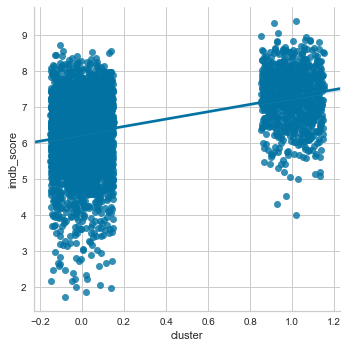

In [123]:
sns.lmplot("cluster", "imdb_score", df2, x_jitter=.15, y_jitter=.15)

### How to determine an optimal value of k

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

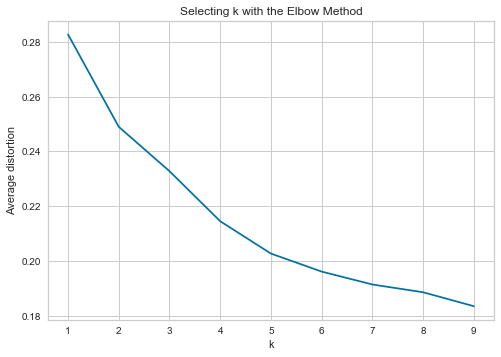

In [124]:
#The Elbow method

#https://www.packtpub.com/big-data-and-business-intelligence/mastering-machine-learning-scikit-learn#

#http://docs.scipy.org/doc/scipy/reference/spatial.distance.html
#Computes distance between each pair of the two collections of inputs
from scipy.spatial.distance import cdist 

K = range(1, 10) 

meandistortions = []

for k in K: 
    kmeans = KMeans(n_clusters=k, random_state=1) 
    kmeans.fit(df_norm) 
    meandistortions.append(sum(np.min(cdist(df_norm, kmeans.cluster_centers_, 'euclidean'), axis=1)) / df_norm.shape[0]) 

plt.plot(K, meandistortions, 'bx-') 
plt.xlabel('k') 
plt.ylabel('Average distortion') 
plt.title('Selecting k with the Elbow Method') 

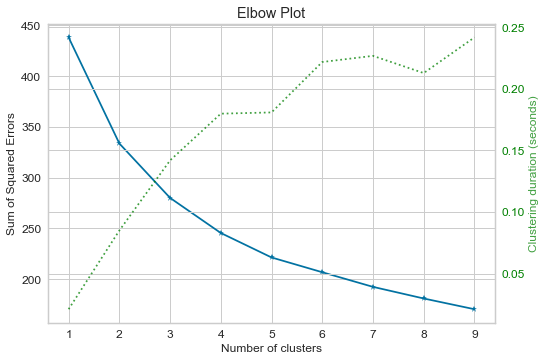

In [125]:
#using scikit-plot python package (https://github.com/reiinakano/scikit-plot) ... you need to install 
# !pip install scikit-plot

import scikitplot as skplt

kmeans = KMeans(random_state=1) 
skplt.cluster.plot_elbow_curve(kmeans, df_norm, cluster_ranges=range(1, 10))

 The graph suggest that 2 or 3 is a good value for K - The average distortion improves rapidly as we increase from 1 to 2. - There is little improvement for values of greater than 3.

## 8.2 Hierarchical Clustering Algorithms - Agglomerative Clustering

In [160]:
np.random.seed(1) # setting random seed to get the same results each time.

agg= AgglomerativeClustering(n_clusters=2, linkage='ward').fit(df)
agg.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

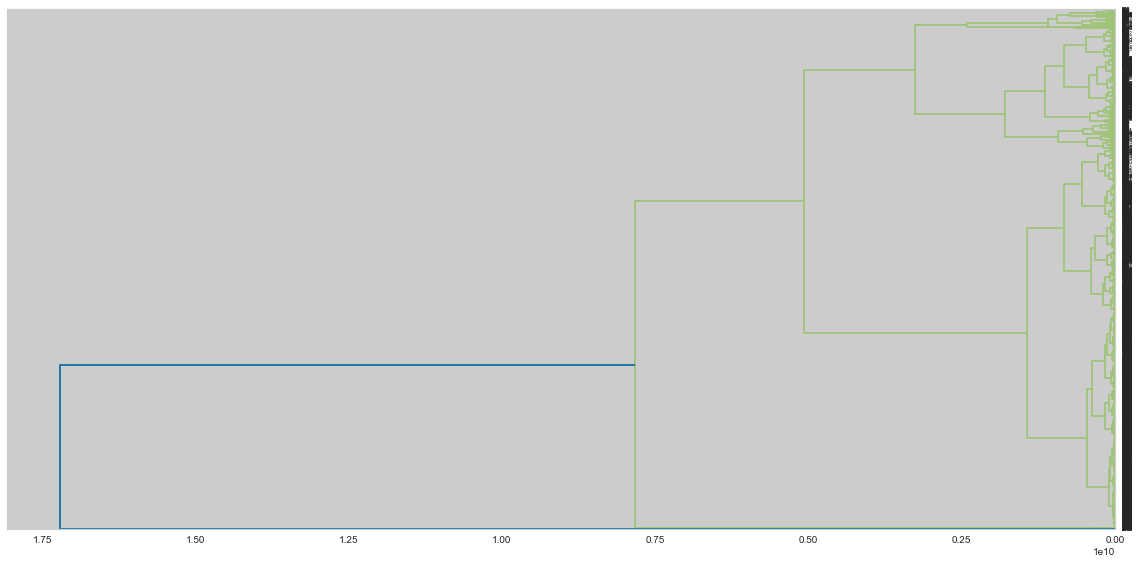

In [161]:
plt.figure(figsize=(16,8))

linkage_matrix = ward(df)
dendrogram(linkage_matrix, orientation="left")
plt.tight_layout() # fixes margins

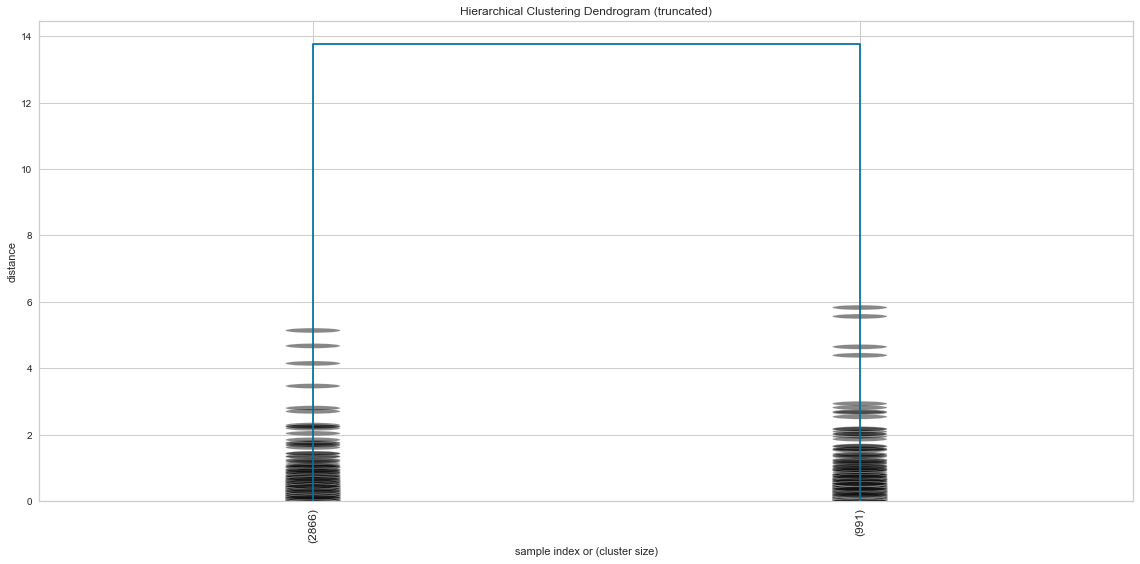

In [162]:
plt.figure(figsize=(16,8))

plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')

linkage_matrix = ward(X)
dendrogram(linkage_matrix, 
           truncate_mode='lastp',  # show only the last p merged clusters
           p=2,  # show only the last p merged clusters
           #show_leaf_counts=False,  # otherwise numbers in brackets are counts
           leaf_rotation=90.,
           leaf_font_size=12.,
           show_contracted=True,  # to get a distribution impression in truncated branches
           orientation="top")
plt.tight_layout() # fixes margins

In [153]:
#To add cluster label into the dataset as a column
df1 = pd.DataFrame(agg.labels_, columns = ['cluster'])
df1.head()

cluster
0        0
1        0
2        0
3        0
4        0

In [163]:
df2 = df.join(df1)
df2.head()

num_critic_for_reviews  duration  director_facebook_likes  \
0                   723.0     178.0                      0.0   
1                   302.0     169.0                    563.0   
2                   602.0     148.0                      0.0   
3                   813.0     164.0                  22000.0   
4                   462.0     132.0                    475.0   

   actor_3_facebook_likes  actor_1_facebook_likes        gross  \
0                   855.0                  1000.0  760505847.0   
1                  1000.0                 40000.0  309404152.0   
2                   161.0                 11000.0  200074175.0   
3                 23000.0                 27000.0  448130642.0   
4                   530.0                   640.0   73058679.0   

   num_voted_users  cast_total_facebook_likes  facenumber_in_poster  \
0           886204                     4834.0                   0.0   
1           471220                    48350.0                   0.0   
2           275868                    11700.0                   1.0   
3          1144337                   106759.0                   0.0   
4           212204                     1873.0                   1.0   

   num_user_for_reviews       budget  title_year  actor_2_facebook_likes  \
0                3054.0  237000000.0        2009                   936.0   
1                1238.0  300000000.0        2007                  5000.0   
2                 994.0  245000000.0        2015                   393.0   
3                2701.0  250000000.0        2012                 23000.0   
4                 738.0  263700000.0        2012                   632.0   

   imdb_score  aspect_ratio  movie_facebook_likes  cluster  
0         7.9          1.78               33000.0        0  
1         7.1          2.35                   0.0        0  
2         6.8          2.35               85000.0        0  
3         8.5          2.35              164000.0        0  
4         6.6          2.35               24000.0        0

In [164]:
df2.groupby('cluster').mean()

num_critic_for_reviews    duration  director_facebook_likes  \
cluster                                                                
0                    314.485368  120.524723              2663.946519   
1                    110.420796  106.189463               133.580251   

         actor_3_facebook_likes  actor_1_facebook_likes         gross  \
cluster                                                                 
0                   1624.450050            12117.145308  9.846145e+07   
1                    441.379972             5994.605373  3.447130e+07   

         num_voted_users  cast_total_facebook_likes  facenumber_in_poster  \
cluster                                                                     
0          248118.545913               18914.470232              1.121090   
1           51903.484648                8569.951151              1.462317   

         num_user_for_reviews        budget   title_year  \
cluster                                                    
0                  685.542886  7.921123e+07  2007.186680   
1                  202.200977  3.344221e+07  2001.644103   

         actor_2_facebook_likes  imdb_score  aspect_ratio  \
cluster                                                     
0                   3796.246216    7.038446      2.180252   
1                   1320.327634    6.265108      2.030454   

         movie_facebook_likes  
cluster                        
0                28099.958628  
1                 2505.422191

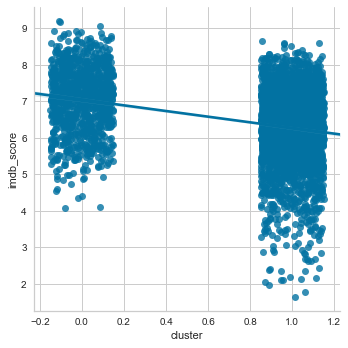

In [165]:
sns.lmplot("cluster", "imdb_score", df2, x_jitter=.15, y_jitter=.15)

## Interpretation 

Cluster 1 has a higher IMDb score than cluster 2. But if you look inside it, you get the same result as KNN analysis. The IMDb score is said to be determined by num_voted_users, num_user_for_reviews, num_critic_for_reviews, and director_facebook_likes. The conclusions of both methods are the same. It is explained that num_voted_users is the most important variable.

### Compare the results from K-Mean clustering analysis and Agglomerative clustering analysis.

Agglomerative clustering is more accurate. K-means is a very simple and widely used clustering technique. It divides a dataset into ‘k’ clusters. The ‘k’ must be supplied by the users, hence the name k-means. It is general purpose. If we know the number of clusters before hand, we have everything we need to apply k-means. However, in practice, it’s rare that the number of clusters in the dataset is known.

# 9. Story telling

In the business analysis of the movie market, it was possible to derive a valuable interpretation by combining previously anticipated and unexpected results. In this analysis, IMDb scores were objectively analyzed as the success index of the film.

First, we found that casting a very popular actor with a lot of money can never affect movie success. Actor1 was found to affect IMDb scores at a marginal level. Actor 3, like the popular actor, has the same level of influence as the director, but overall, the impact appears to be insignificant. Then, it can be pointed out that the movie level should be raised rather than the popular movie actor.

Second, we confirmed that many film productions can never guarantee success. Most movies with an IMDb score have been released after 2000. Compared to that before, the number of film productions was small, but the IMDb score was high. Of the movies released since 2000, there are, of course, many good ones. But as the indicators show, we find that there are a lot of movies with very low scores and failing to hit the box and those with very low scores. The implication is that even if you make a movie, you should not be making a movie that doesn't get people's attention and gets a low IMDb score.

Third, although many film critics are involved in giving IMDb ratings much more than users. Many critics never give good marks to movies. Then we can find something unusual here. Rather than focusing on film critics, the film should get a lot of attention from the public and get IMDb scores by the masses. Of course, we found that users were much less likely to give IMDb scores than critics. But don't forget that IMDb scores are more influenced by users' votes. Many users write reviews and many critics, but we can see that their numbers are small compared to the total votes. This suggests that you don't have to pay too much attention to this criticism when making a movie.

Fourth, it should be recognized that factors outside the movie are extremely important. Movie showtimes have a large impact on IMDb scores. Filmmakers should keep in mind that people are bored and struggling with long movies. The film should also avoid retro styles. There are many masterpieces of old movies. But the fact that a new film has that old movie style has a very bad effect on the box office. When making a movie poster, a sensational method is strongly recommended, without the faces of the characters, rather than the old way of arranging the characters. It is also important to recognize that people never like old movies and that they don't have to go too far in fashion, but they also need to lead the culture as appropriate.

Five, It is important to note that there is a difference in scoring IMDb among users in each country. If you're making a movie targeting the big North American market, you should think once more about why users aren't so generous about their scores. In particular, the US market is very diverse, from the lowest to the highest. It should be borne in mind that these scores have many users who are very fond of movies, enthusiastic about good movies and deeply disappointed by bad ones. North America, which has such enthusiastic fans, needs to look deeply into the future and recommend having a channel that enables interactive communication with many fans. You can immediately explain misunderstandings about film production and get feedback about the movie being shown. This empirical accumulation will be of great help to future filmmaking.

Sixth, regression using OLS resulted in a coefficient value near zero, even though the P-value was significant. In this regression, it seems complicated to find a meaningful interpretation. Regressions based on traditional OLS cannot be free from multicollinearity because our data is not perfect. This is a problematic factor for the accurate analysis we are seeking. To avoid these factors, We may consider advanced regression techniques such as lasso to deal with multicollinearity. Lasso removes highly correlated variables from the model. This is called "feature selection in regression. This type of regression helps develop parsimonious or straightforward models. Lasso regression also doesn't seem to deal much with the problem of multicollinearity. Since the coefficients of many variables are near zero, it is reasonable to try other regression methods as well. F-regression and Random Forest regression has been performed. Comparing three advanced regression, Random Forest regression is the best regression method. Random Forest regression indicates that 'num_voted_users', 'duration', and 'budget' are important variables on predicting the IMDb score. However, we need to use more different analysis tools for better interpretation of IMDb data analysis.

Seventh, Classification enables us to understand the relationships between things that may not be visible when looking at them as a whole. Many variables may affect how a movie score in a real-world setting and classifying those variables allows us to evaluate which ones have the most significant impact, and which can be controlled. I first create a categorical column using 'imdb_score'. A new variable is 'binning' with 4 categories such as 'bad','OK', 'Good', and 'Excellent'. I have an estimated 7 classification analyses such as Decision tree, K-Nearest Neighbors (KNN), Logistic regression, Random Forest, Support Vector Machine (SVM), Gradient Boost Classifier, Neural Network. Random Forest Classifier and Gradient Boost Classifiers are the most accurate method, but RFC has a slightly higher score. One important conclusion is that 'num_voted_users' is the most crucial variable for the IMDB score.

Eighth, Cluster analysis is used to classify objects where objects in one group are more related to each other and distinct from objects in different groups. Cluster analysis can be a crucial process to understand the distinct attributes of a large population. I first remove object columns. According to KNN clustering, Cluster 2's IMDb score was slightly higher. Cluster 2's num_critic_for_review is twice as high. Cluster 2's director_facebook_likes is eight times higher. The actor_3_facebook_likes of Cluster 2 is eight times higher. In particular, the difference between num_voted_users and more than 25000 is that this variable is an essential reason for clustering. By the Agglomerative clustering analysis, Cluster 1 has a higher IMDb score than cluster 2. But if you look inside it, you get the same result as KNN analysis. The IMDb score is said to be determined by num_voted_users, num_user_for_reviews, num_critic_for_reviews, and director_facebook_likes. The conclusions of both methods are the same. It is explained that num_voted_users is the most important variable. Agglomerative clustering is more accurate. K-means is a straightforward and widely used clustering technique. It divides a dataset into 'n' clusters. The users must supply the 'n', hence the name k-means. It is general-purpose. If we know the number of clusters beforehand, we have everything we need to apply k-means. However, in practice, the number of clusters in the dataset is rarely known.



